# **Evaluation of Synthetic Data Models via GAN**

#**Libraries Installations**

In [3]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**All Libraries Imports**

In [4]:
import os
import csv
import sys
import seaborn as sns
import platform
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from table_evaluator import TableEvaluator


OS = platform.system()   # Operating System 

#**Globals**

In [5]:
countings = True
univariate = True
bivariate = True
general_evaluator = True
privacy_metrics = True
verbose = False

#**Hyper-Parameters**

In [6]:
epochs = 500

#**Data Download**

In [7]:
!git clone https://github.com/istat-methodology/Synthetic_Data.git

Cloning into 'Synthetic_Data'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (803/803), done.
remote: Compressing objects: 100% (525/525), done.
remote: Total 803 (delta 258), reused 790 (delta 245), pack-reused 0
Receiving objects: 100% (803/803), 228.05 MiB | 27.07 MiB/s, done.
Resolving deltas: 100% (258/258), done.
Updating files: 100% (251/251), done.


#**Visualization Options Settings**

In [8]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 

#**All Initializations**

In [9]:
orig_data_path = '/content/Synthetic_Data/synthetic_data/Python/Output/syntetic_telephony_preprocessed_export.xlsx'
synth_data_path = '/content/Synthetic_Data/synthetic_data/Python/Output/'
display_matches = False

#**All General Functions Definitions**

In [10]:
def explore_data(data): 
  print("\nHead of Data: \n", data.head())
  print("\nTail of Data: \n", data.tail())
  print("\nShape of Data: ", data.shape)
  print("\nInformation about Data: \n")
  try: 
    data.info()
  except: 
    pass
  print("\nTypes of Data attributes: \n")
  try: 
    data.dtypes
  except: 
    pass
  print("\nSummary of all numerical fields in the dataset: \n")
  try: 
    data.describe(include = [np.number])
  except: 
    pass
  print("\nSummary of all categorical fields in the dataset: \n")
  try: 
    data.describe(include = ['O'])
  except: 
    pass
  print("\nLoop Through Each Column and Check for nulls: \n")
  try: 
    for i in range(len(data.columns)):
        print(data.columns[i] + ": " + str(data[data.columns[i]].isna().sum()))
  except: 
    pass

def data_download(file_to_download, gdrive_code, OS, uncompress = True):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux" and uncompress:
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')
    return True
  else: 
    return None

def cellchange(df1, df2, quasi, exclude_cols):
    uniques1 = df1.drop_duplicates(subset=quasi, keep=False)
    uniques2 = df2.drop_duplicates(subset=quasi, keep=False)
    matcheduniq = uniques1.merge(uniques2, how='inner', on = quasi)
    allcols = set(df1.columns).intersection(set(df2.columns))
       
    cols = allcols - set(quasi) - set(exclude_cols)
    m = match(matcheduniq, cols)
    
    return m, uniques1, uniques2, matcheduniq

def match(df, cols):
    S = pd.Series(data=0, index=df.index)
    for c in cols:
        c_x = c + "_x"
        c_y = c + "_y"
        S = S + (df[c_x] == df[c_y]).astype(int)

    S = (S/len(cols))*100

    return S

def aggr_privacy(S): 
  return 1 - (S / 100).sum() / len(S)

def privacy(orig_data, synth_data, first_par, second_par, fig_name):
    q = first_par
    Qs = q.split(",")
    Qs = [s.strip(" ") for s in Qs]

    x = second_par
    Xs = x.split(",")
    Xs = [s.strip(" ") for s in Xs]
    percents, uniques1, uniques2, matched  = cellchange(orig_data, synth_data, Qs, Xs)
      
    if display_matches is True: 
      print("Matched: \n",matched)
      print("Percents: \n",percents)

    #Histogram
    plt.figure(figsize = (10,10))
    plt.title('Percentage of raw synthetic records that had an apparent match with groundtruth dataset')
    percents.hist()
    plt.xlim(0,100)
    plt.savefig(fig_name)
    #plt.show(False)
    plt.close()
    print("\nPrivacy Metrics Test Aggregated Results: ", aggr_privacy(percents))

#**Data Reading**



/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_1000_data_points
10000 Original Data Read.
1000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


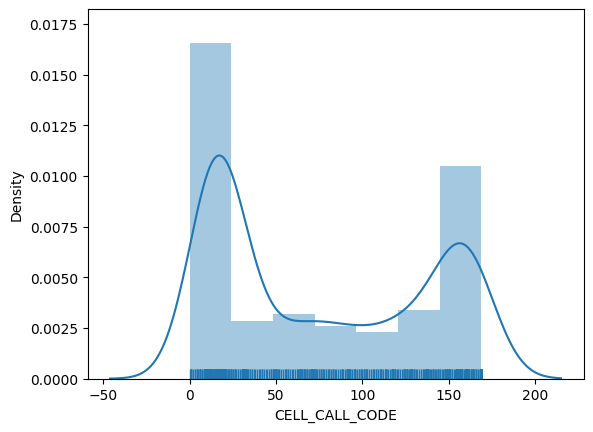

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


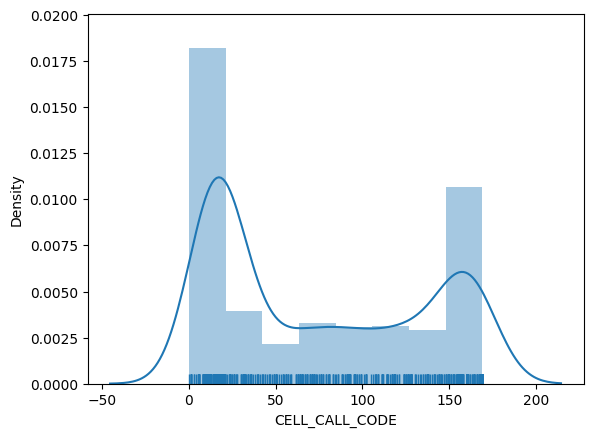

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


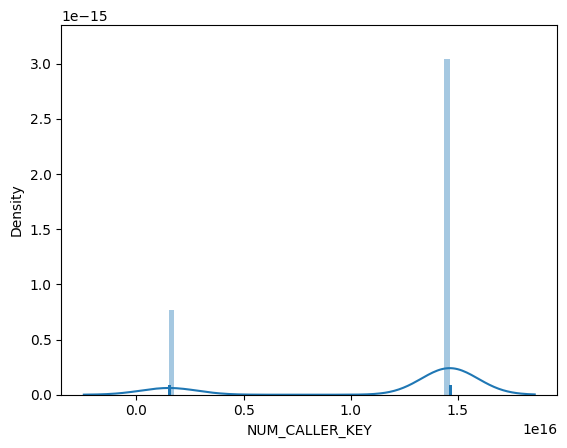

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


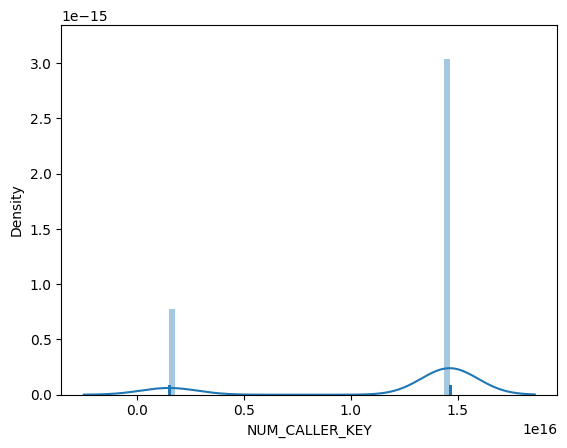

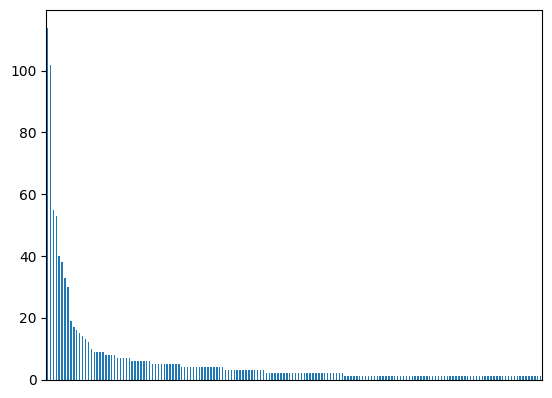

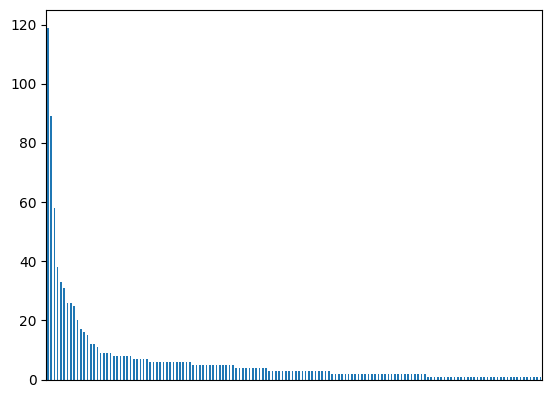

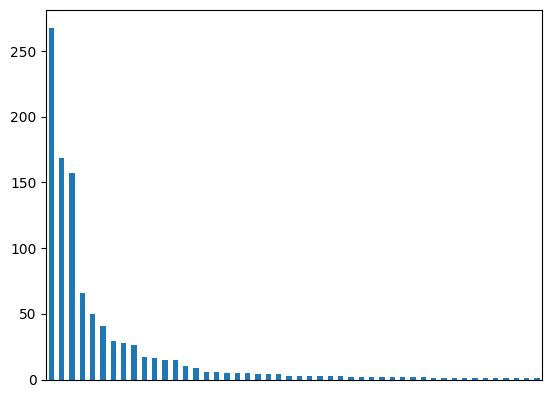

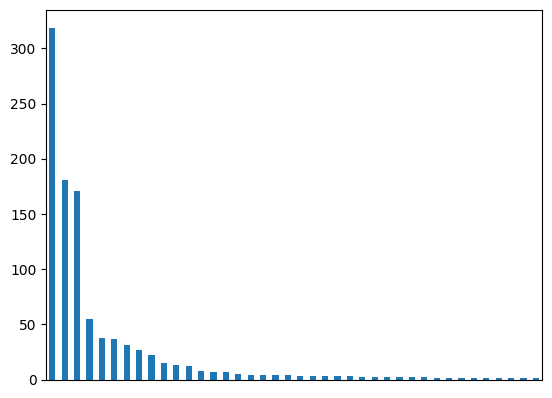

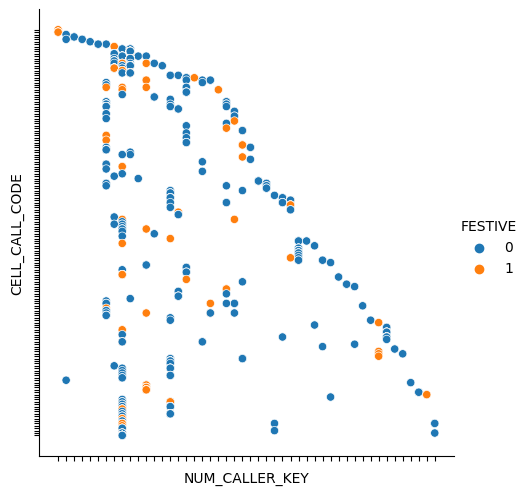

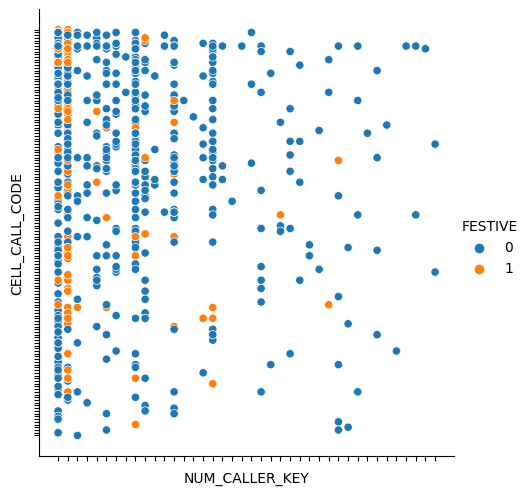


Privacy Metrics Test Aggregated Results:  0.9259259259259259
Privacy Metrics Test 1 - Elapsed Time =  0.5324287870000148

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.8896517759999938


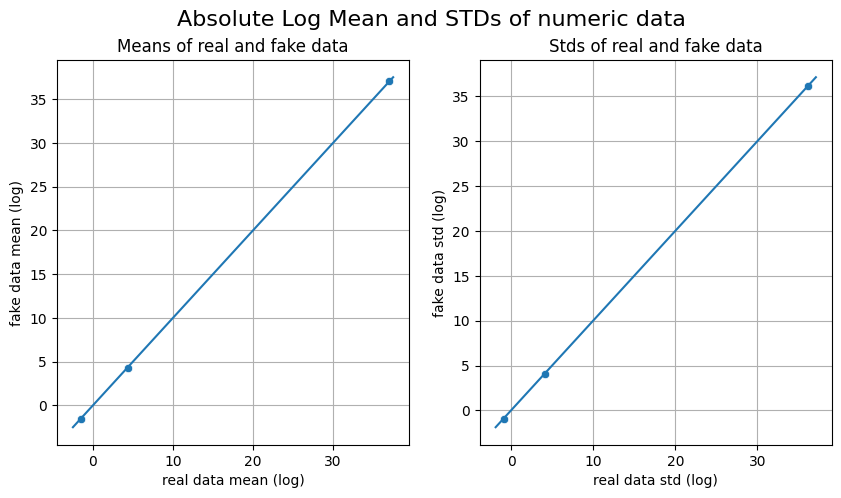

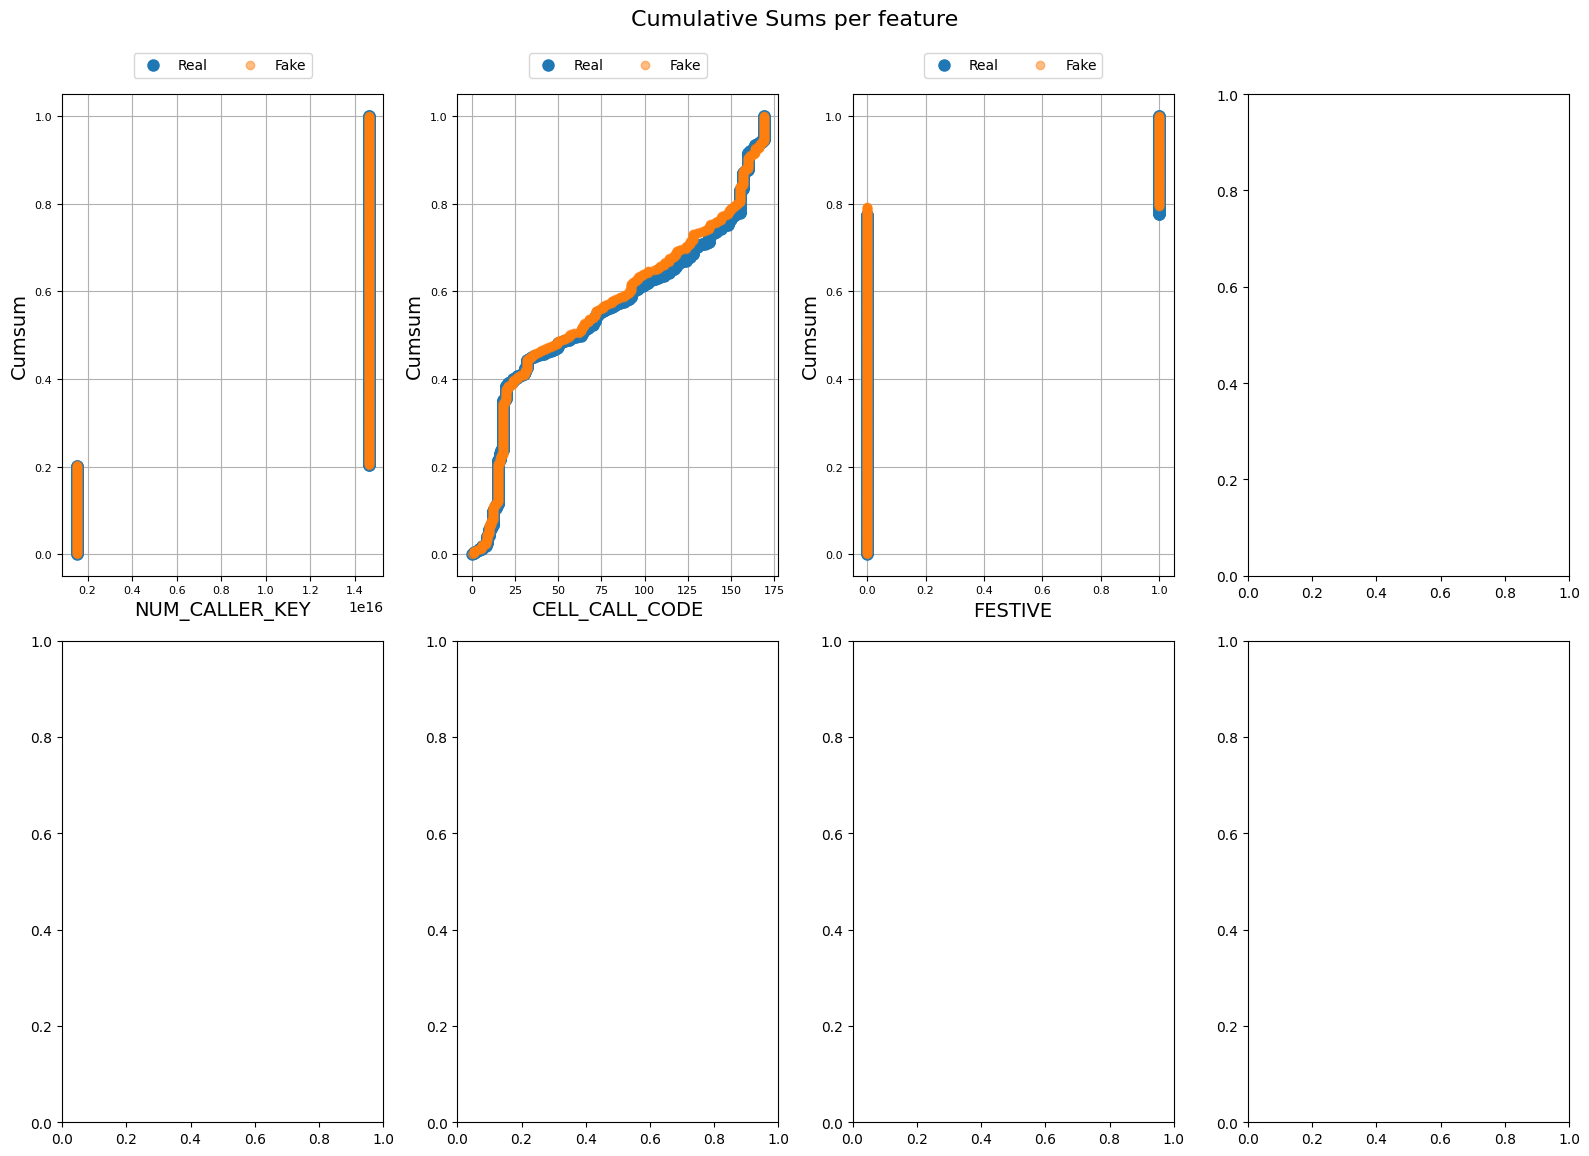

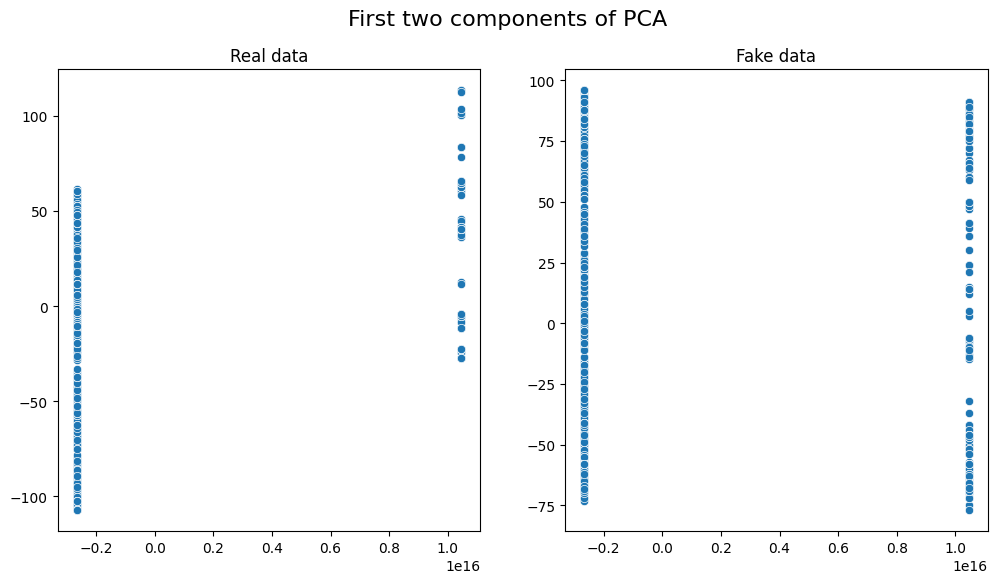


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_2000_data_points
10000 Original Data Read.
2000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


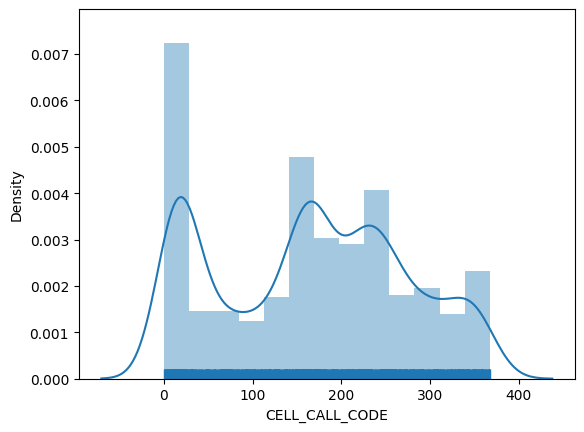

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


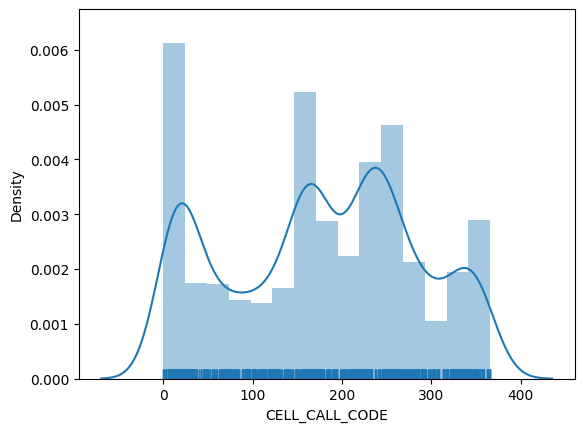

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


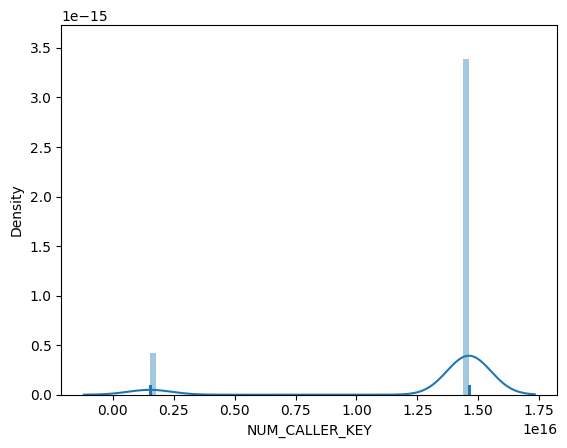

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


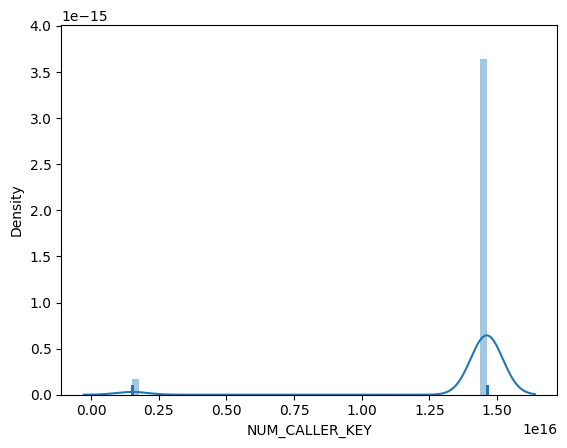

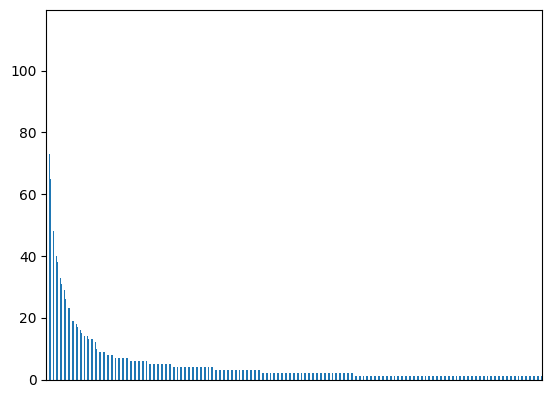

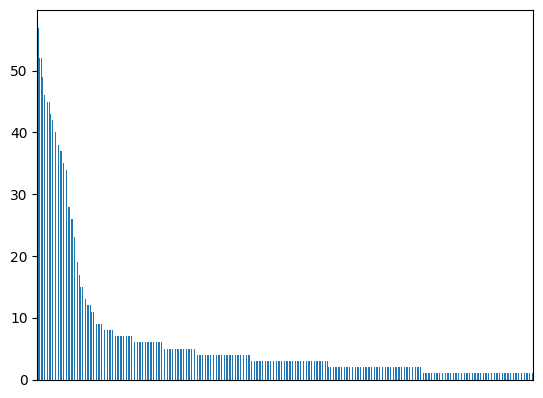

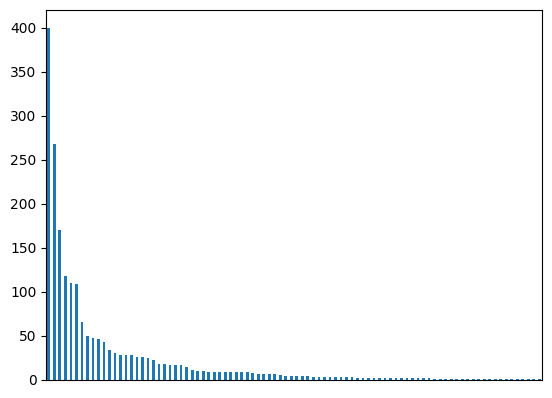

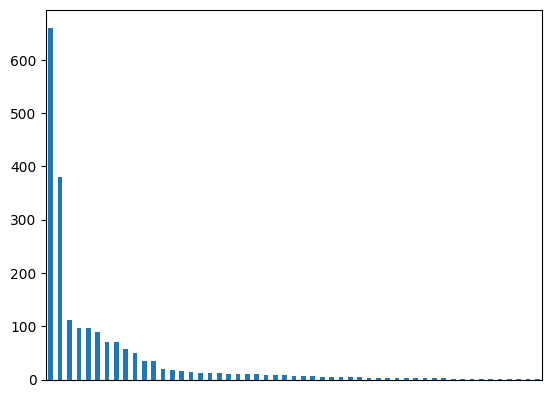

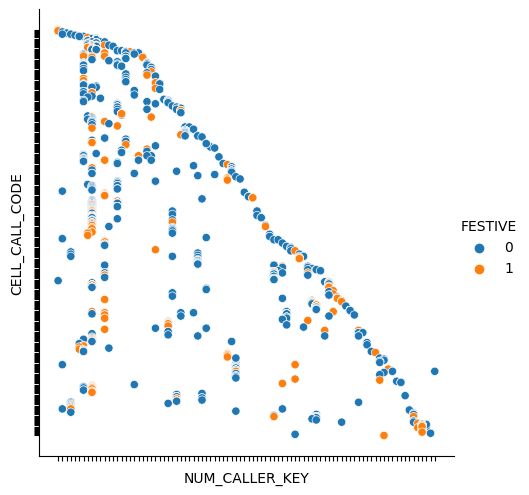

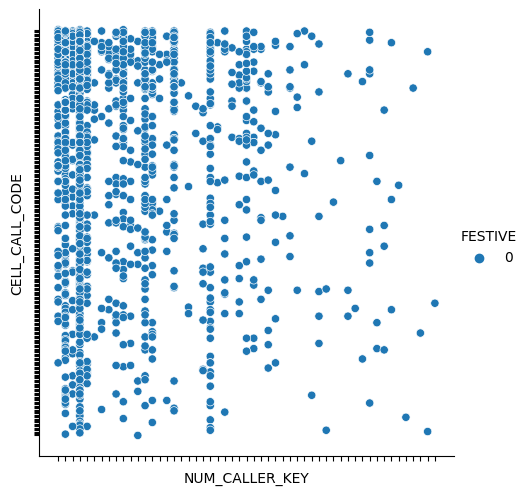


Privacy Metrics Test Aggregated Results:  0.8888888888888888
Privacy Metrics Test 1 - Elapsed Time =  0.20698395900001287

Privacy Metrics Test Aggregated Results:  nan
Privacy Metrics Test 2 - Elapsed Time =  0.17993197399999872


<ipython-input-10-7e3fd55effee>:64: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (S / 100).sum() / len(S)


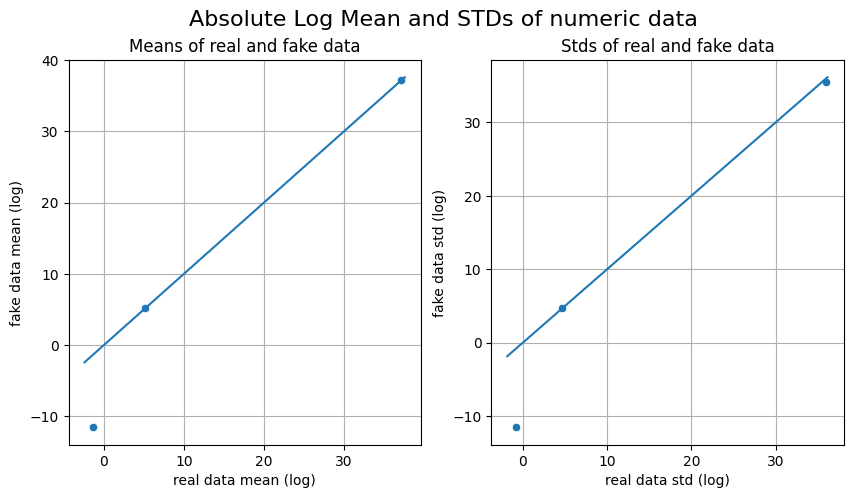

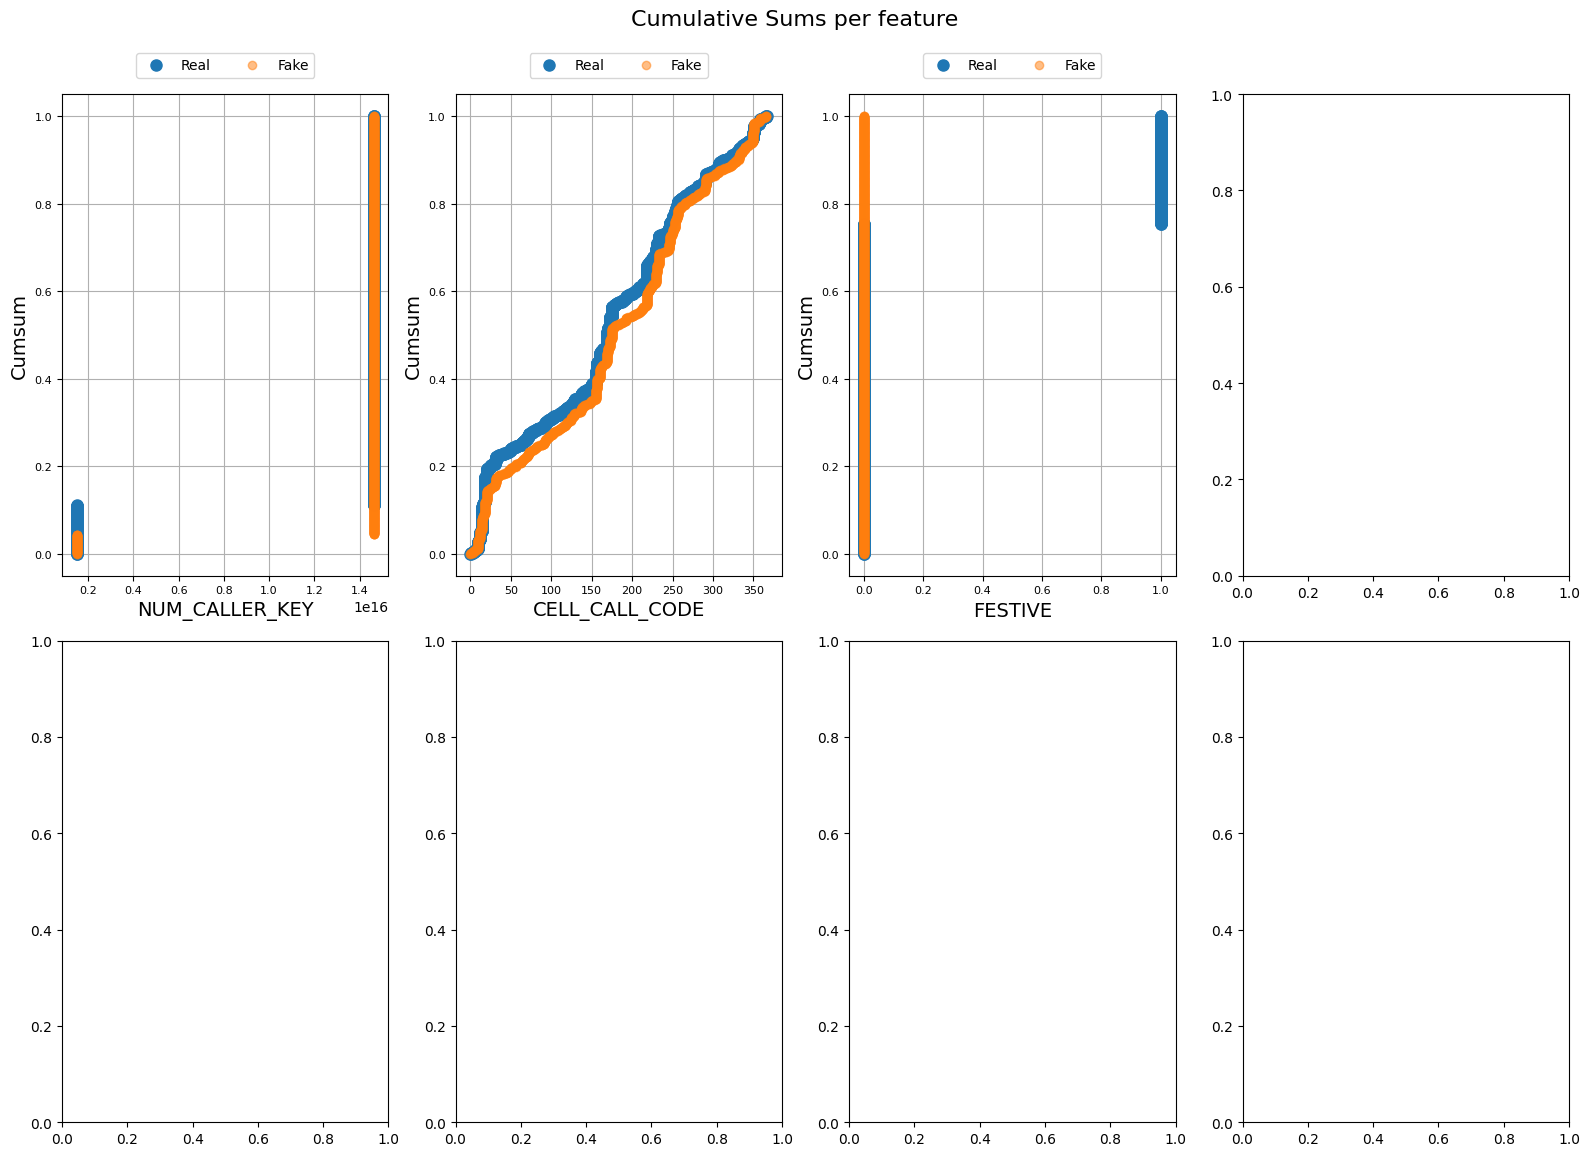

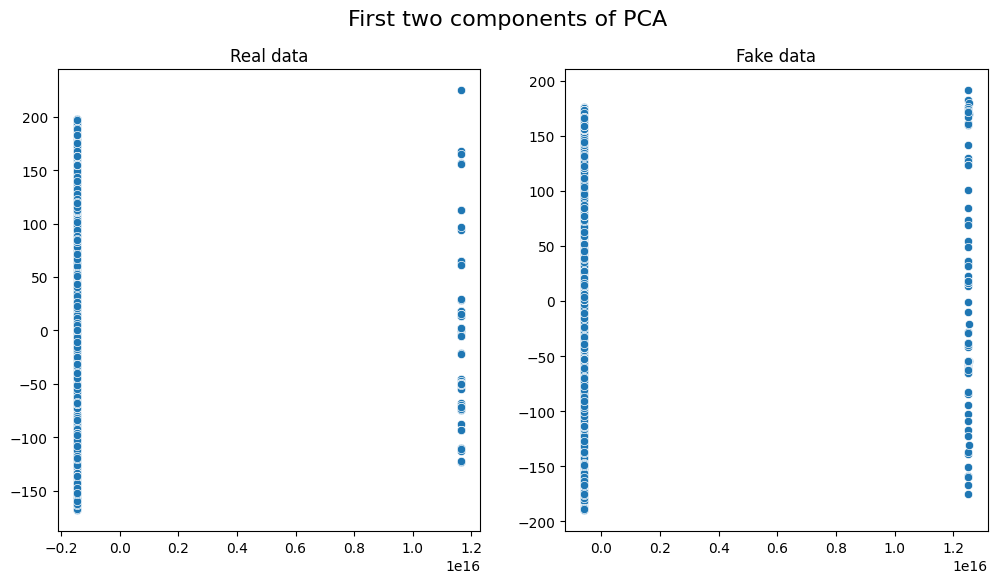


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_3000_data_points
10000 Original Data Read.
3000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


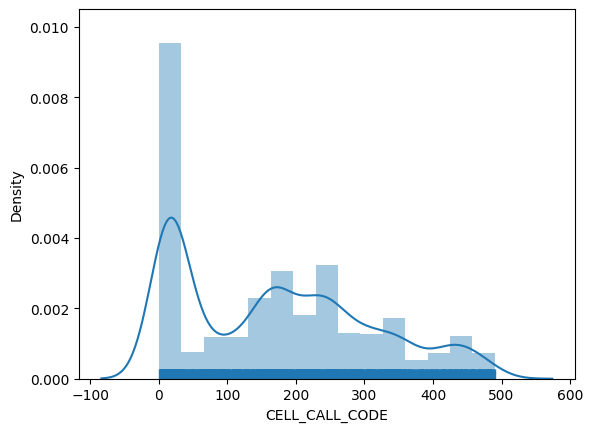

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


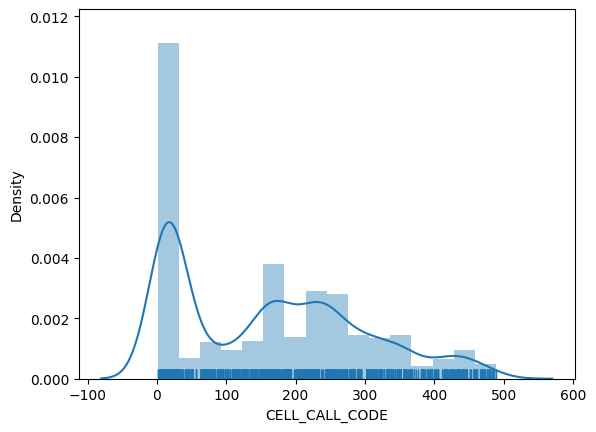

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


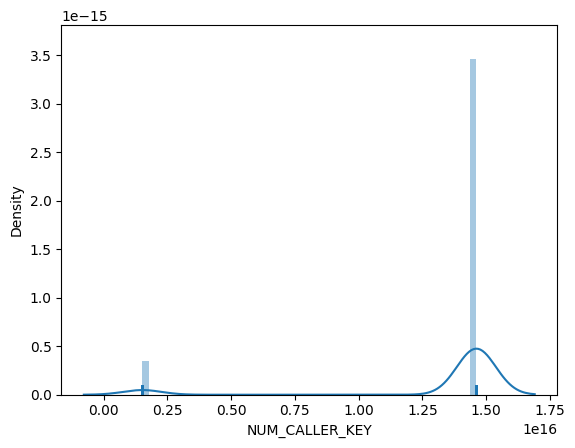

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


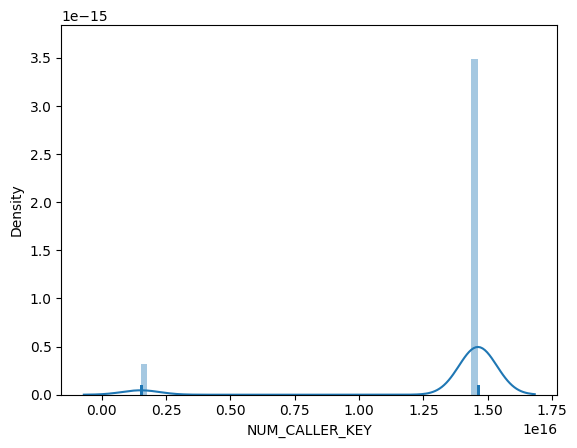

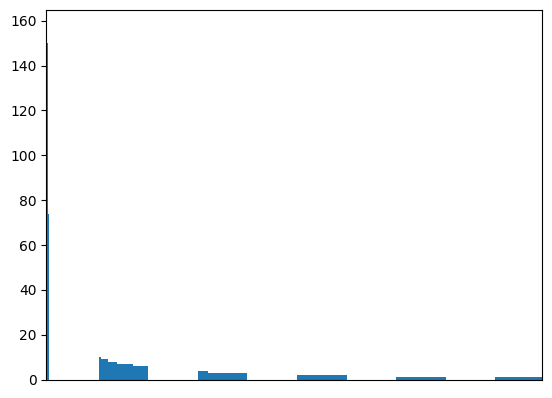

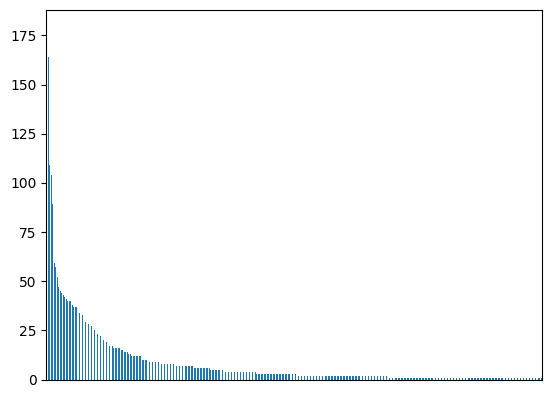

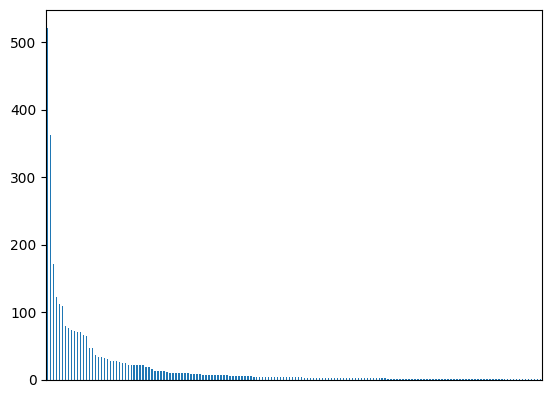

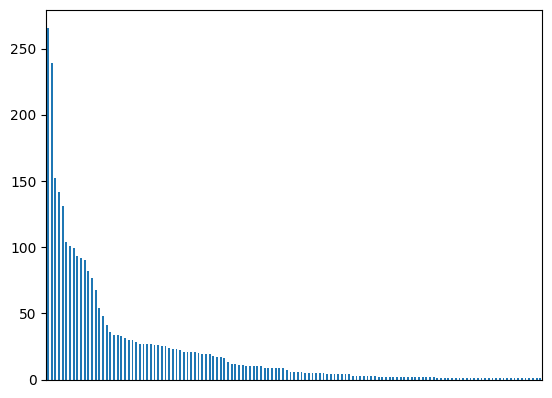

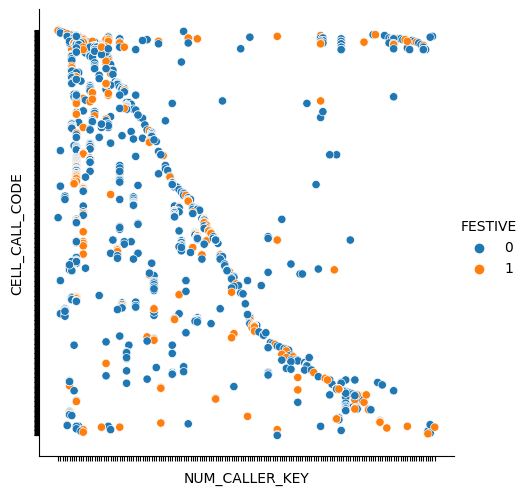

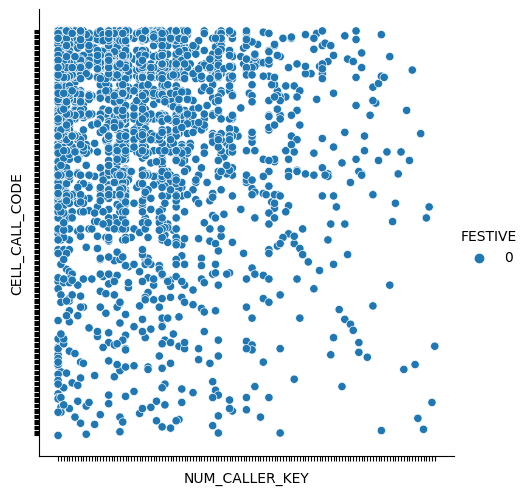


Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 1 - Elapsed Time =  0.2007236879999823

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.20745726699999523


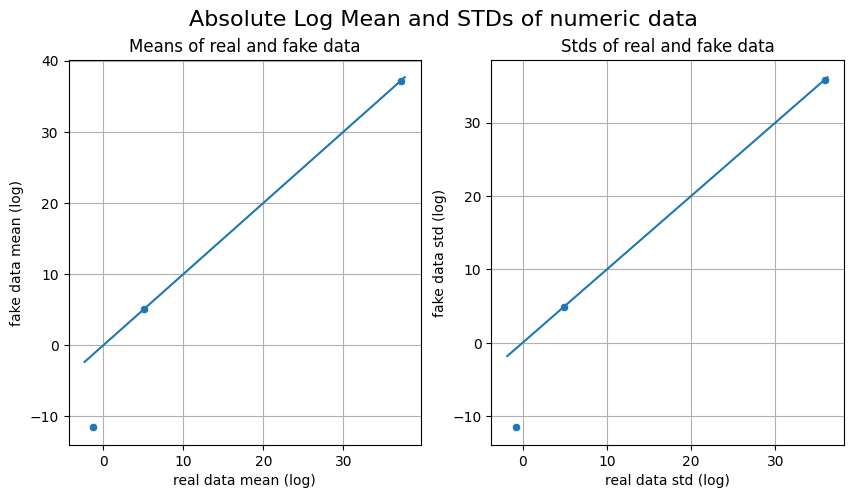

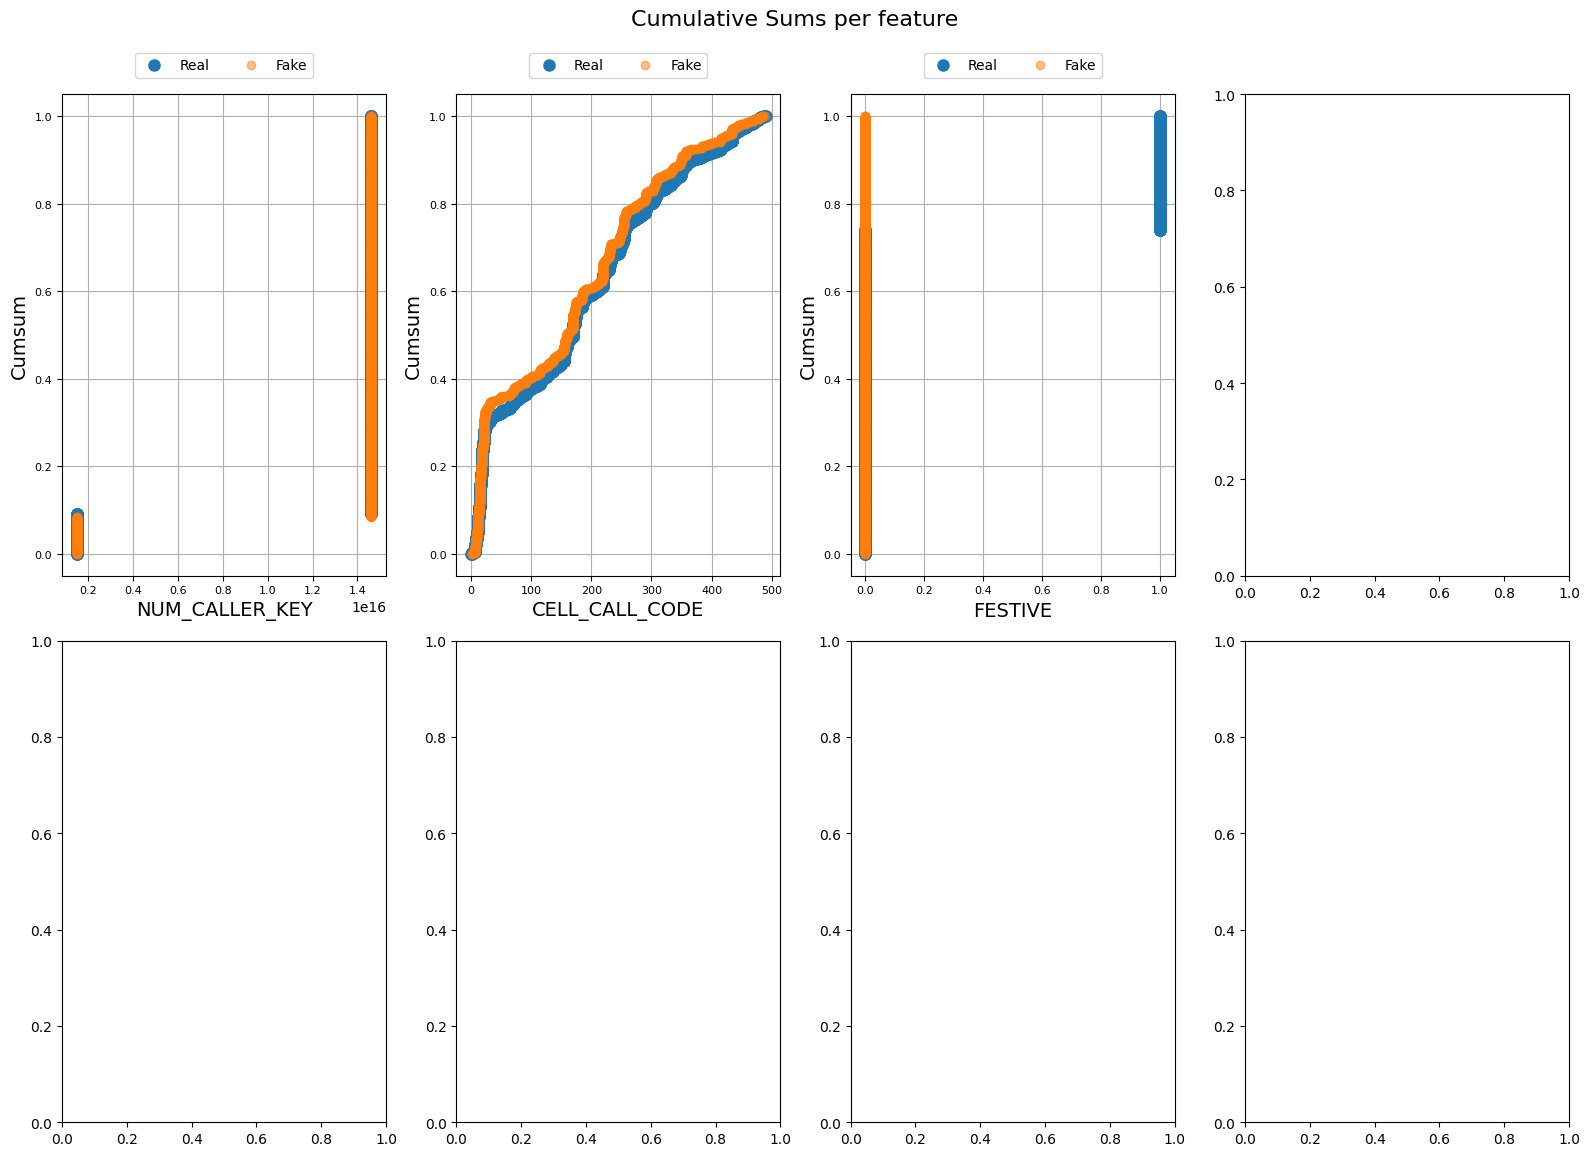

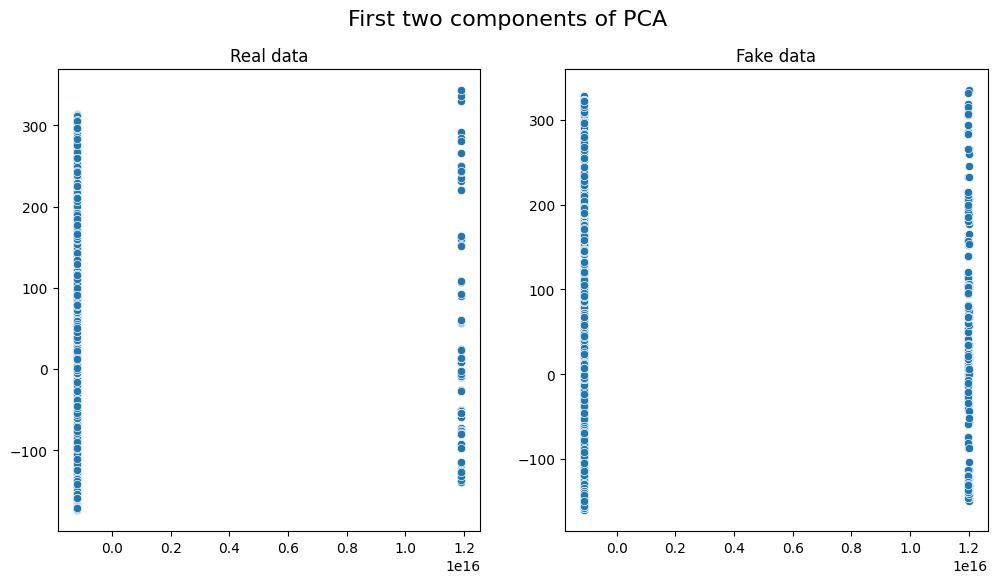


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_4000_data_points
10000 Original Data Read.
4000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


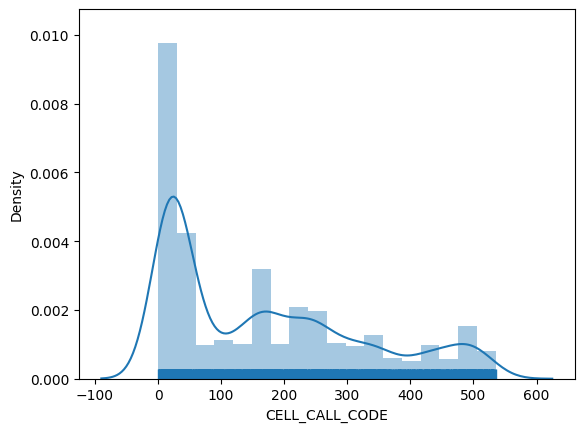

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


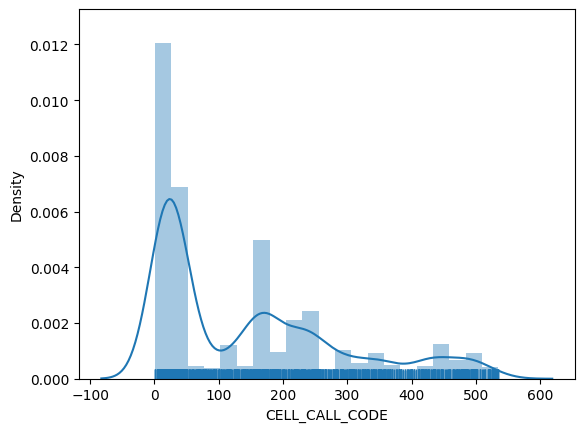

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


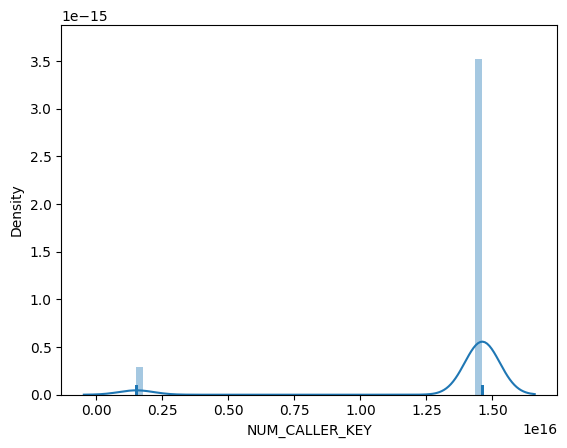

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


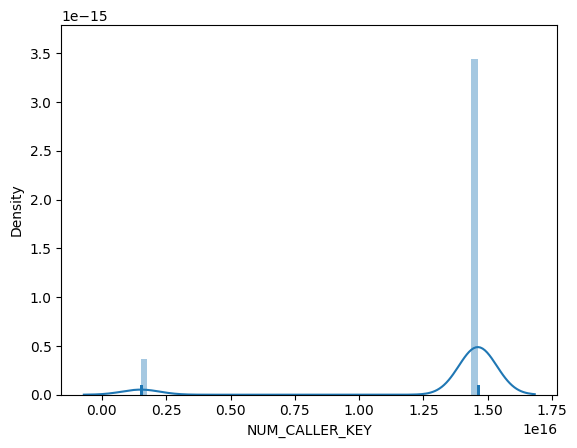

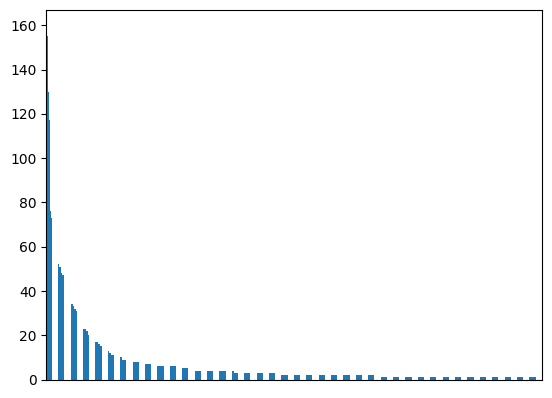

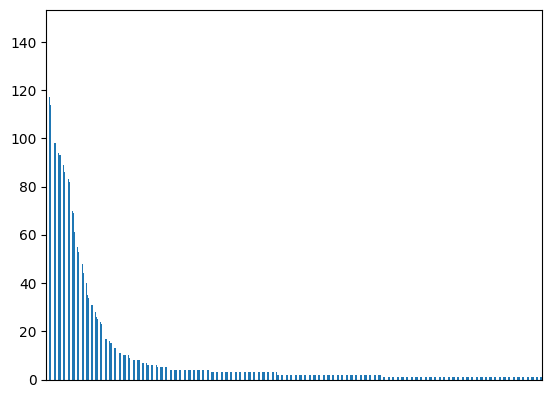

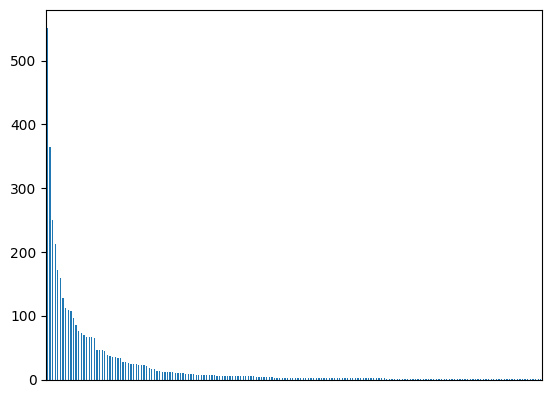

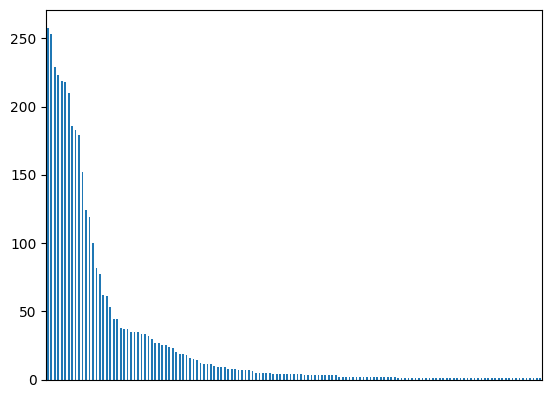

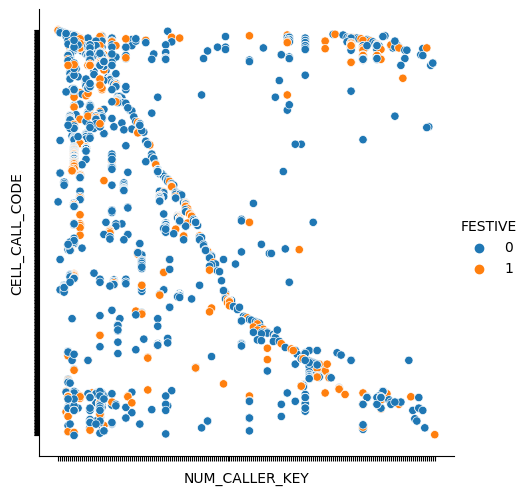

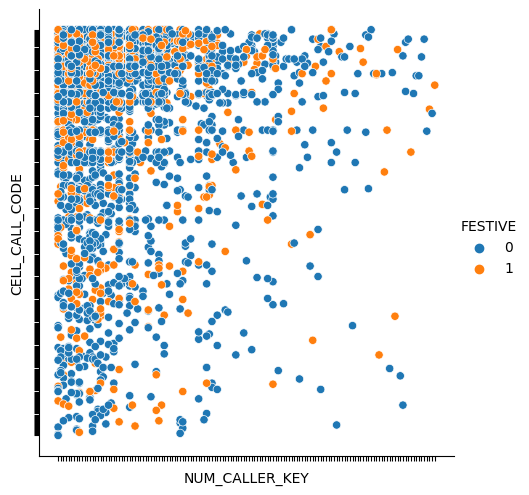


Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 1 - Elapsed Time =  0.20008535300001995

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.1841658989999928


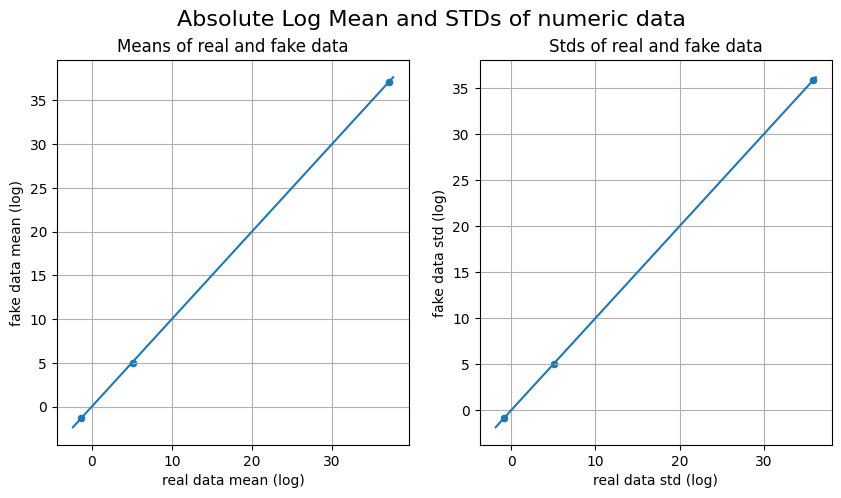

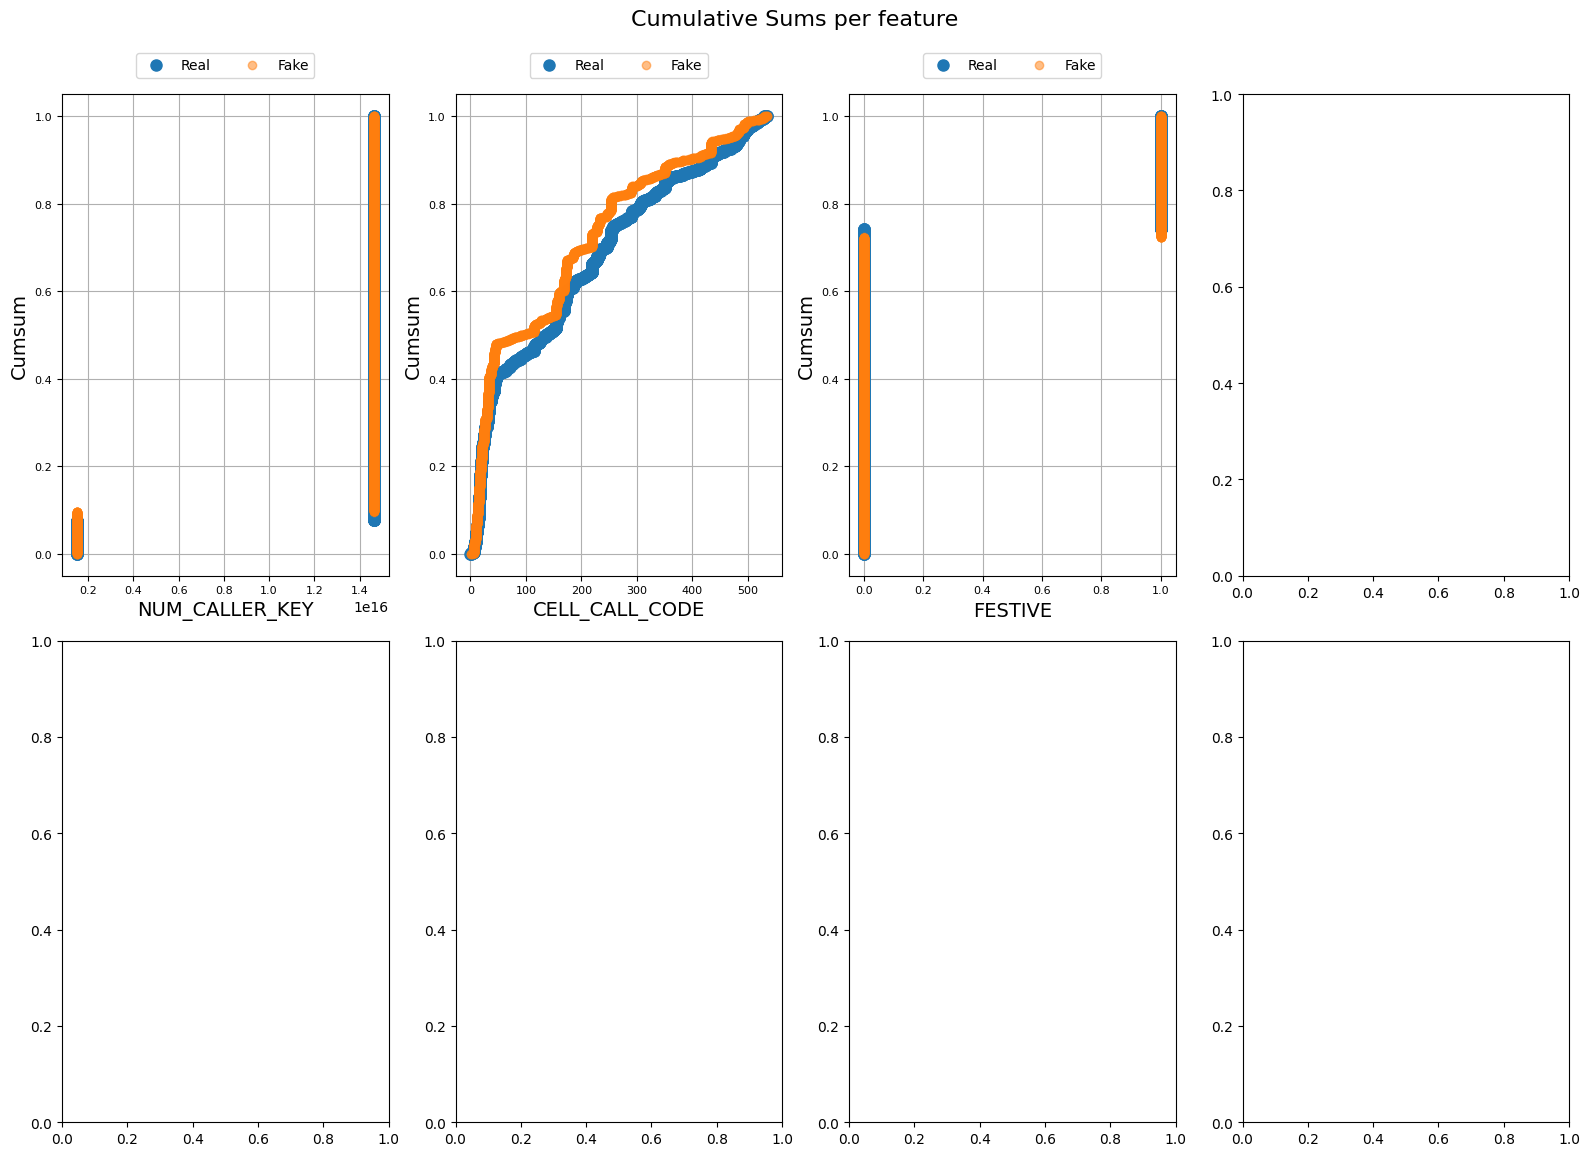

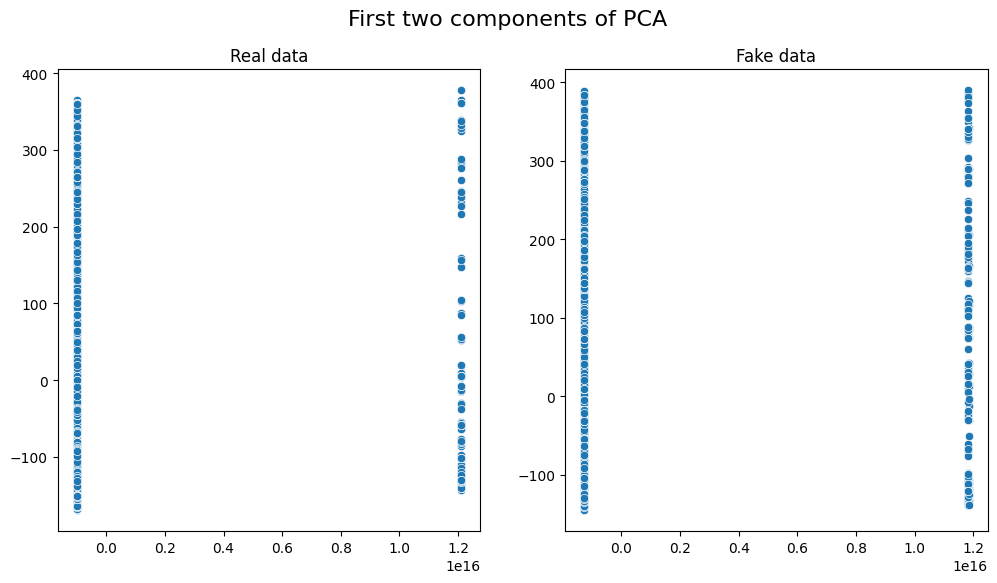


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_100_epochs_5000_data_points
10000 Original Data Read.
5000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


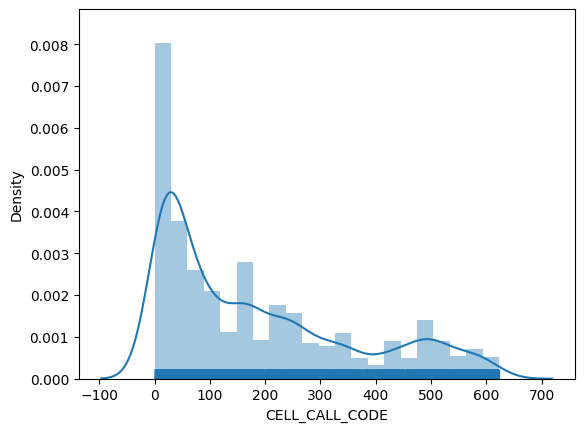

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


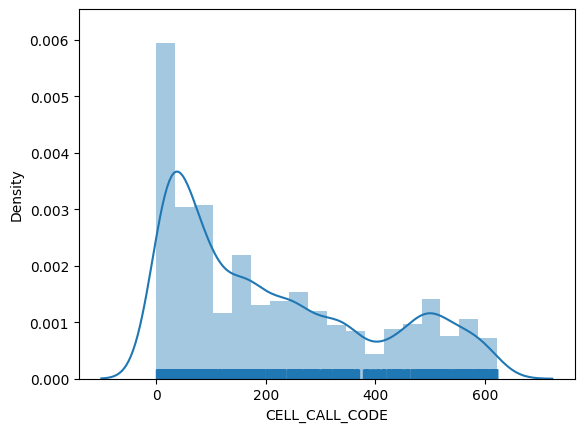

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


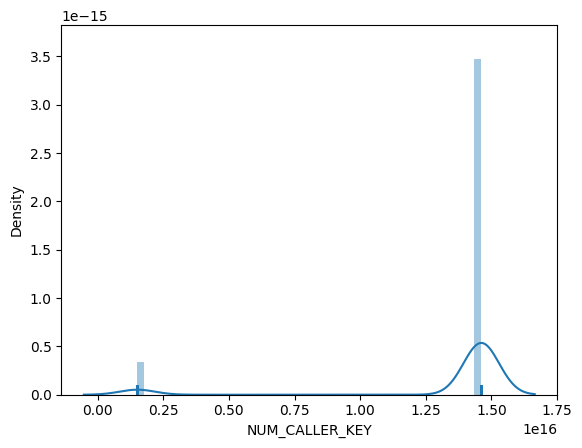

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


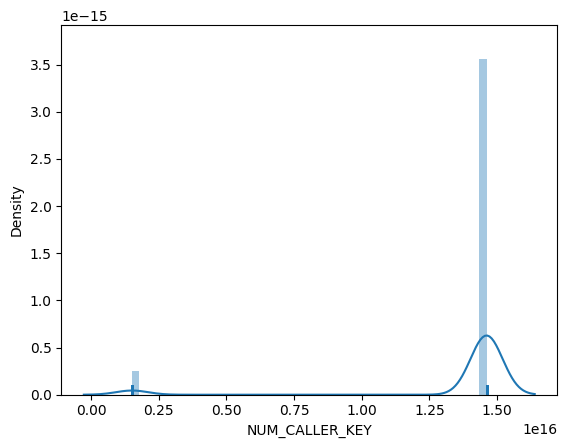

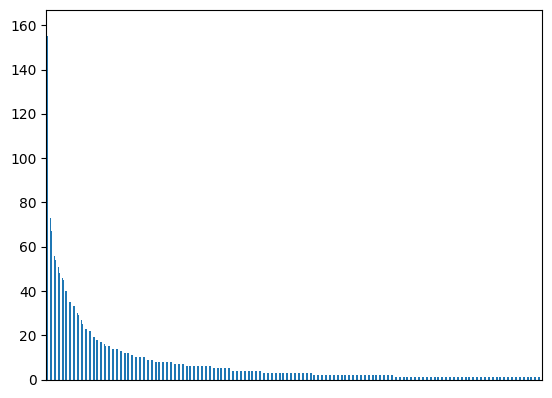

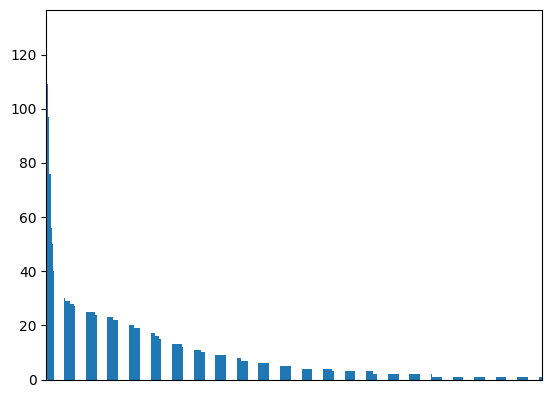

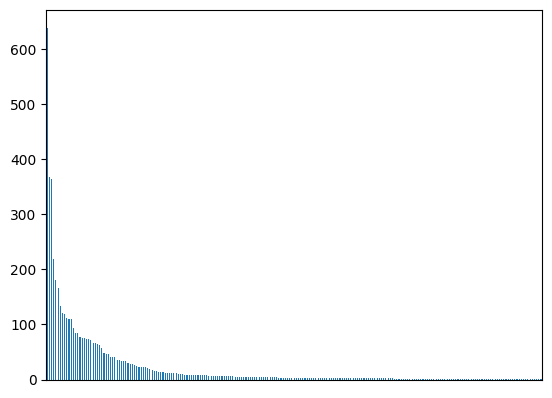

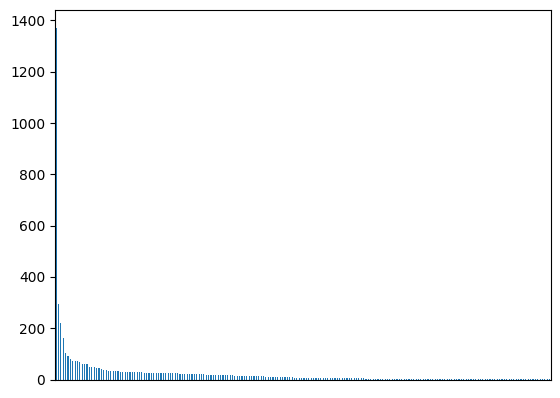

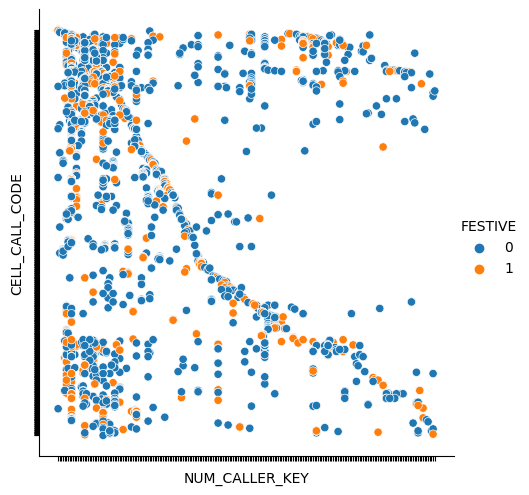

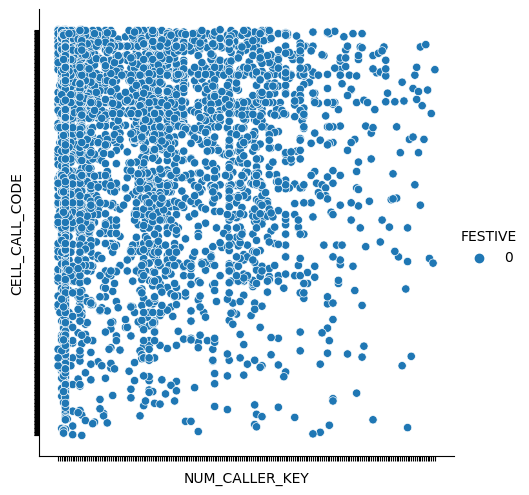


Privacy Metrics Test Aggregated Results:  0.9710144927536232
Privacy Metrics Test 1 - Elapsed Time =  0.22421640599998227

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.18432598499998676


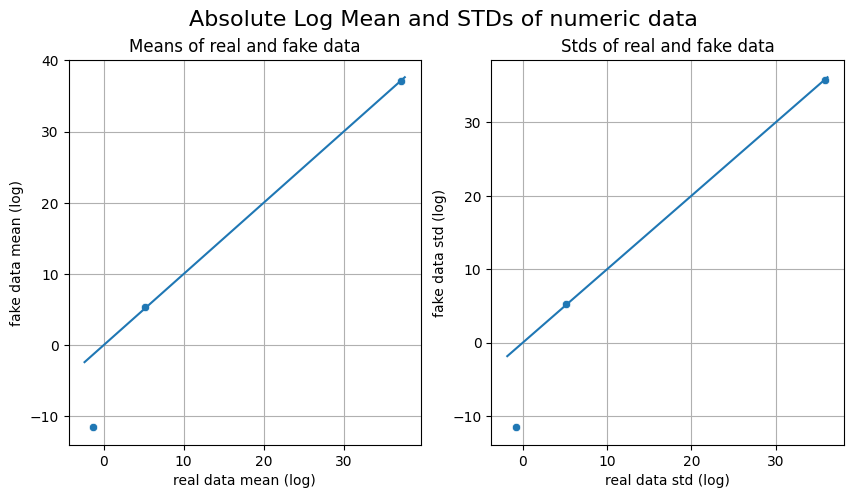

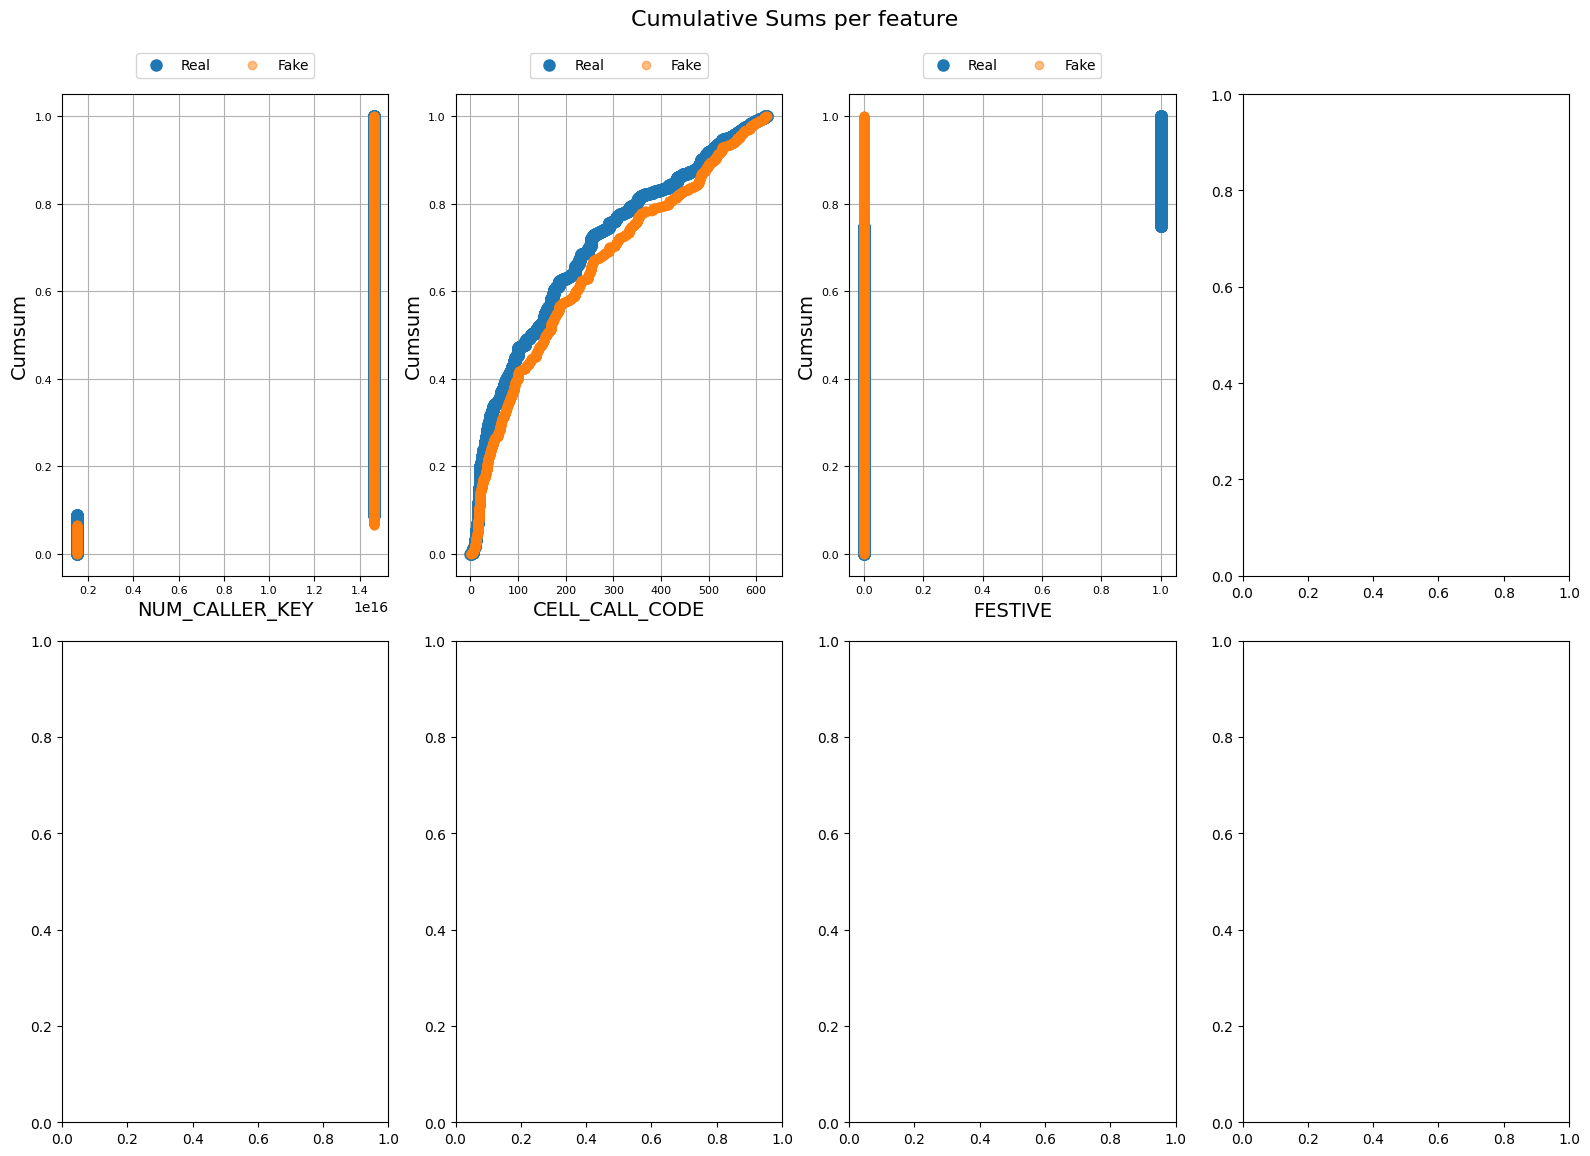

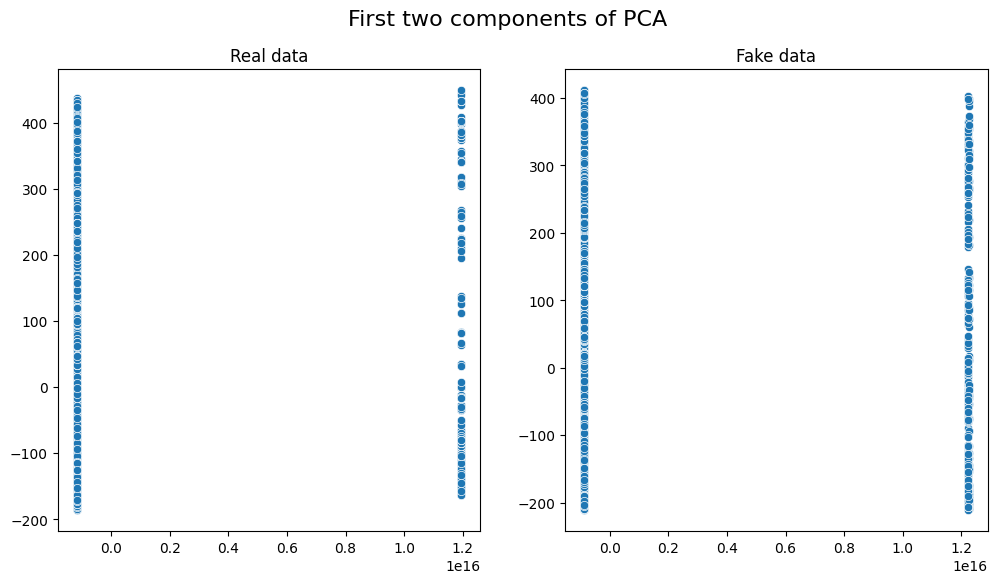


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_20_epochs_5000_data_points
10000 Original Data Read.
5000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


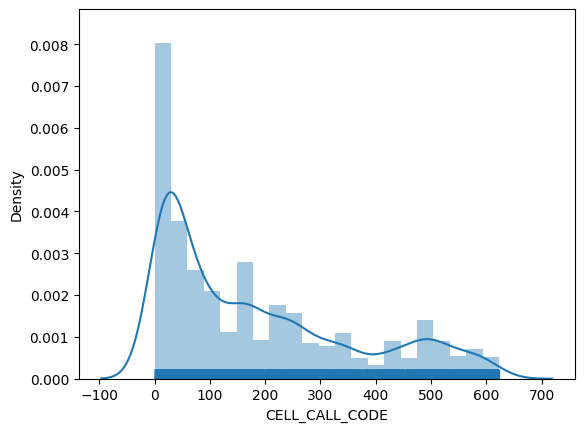

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


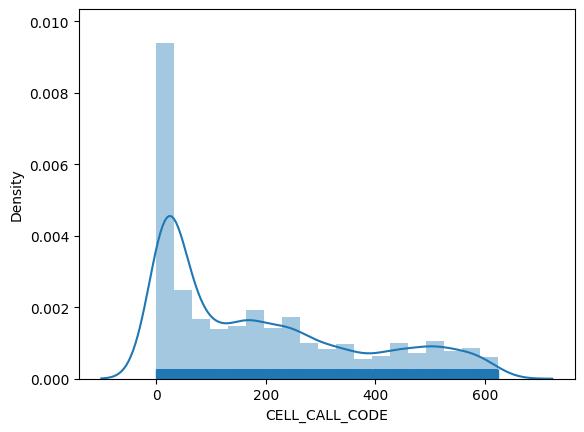

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


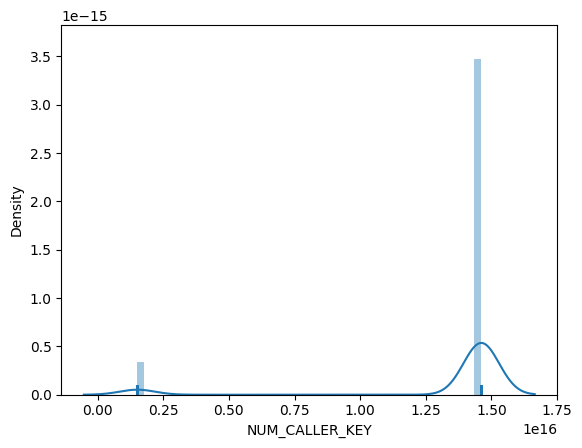

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


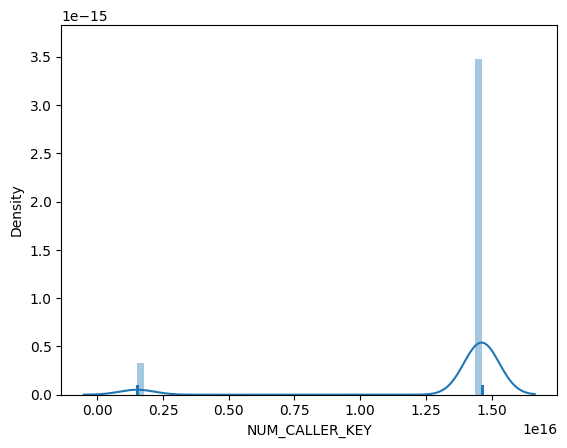

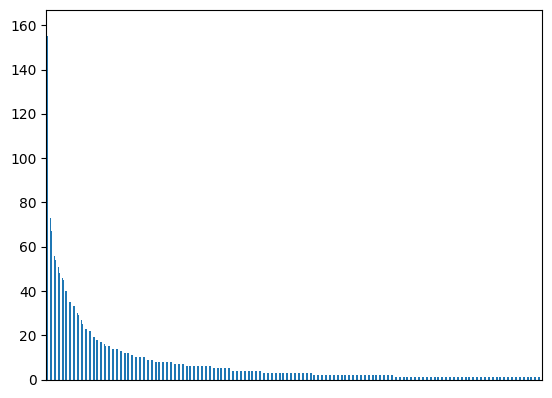

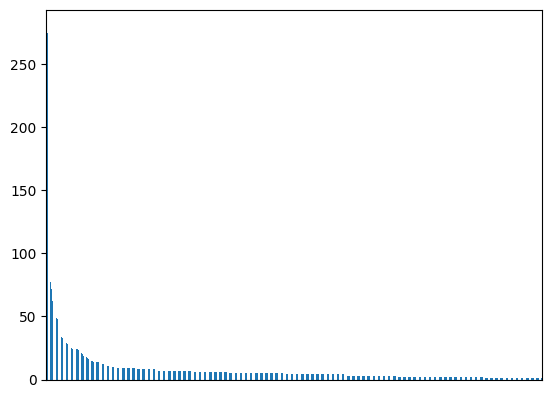

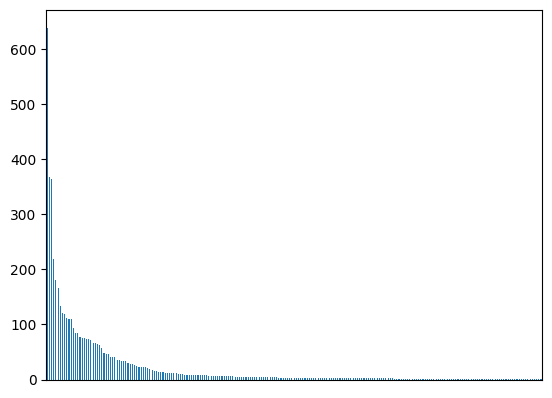

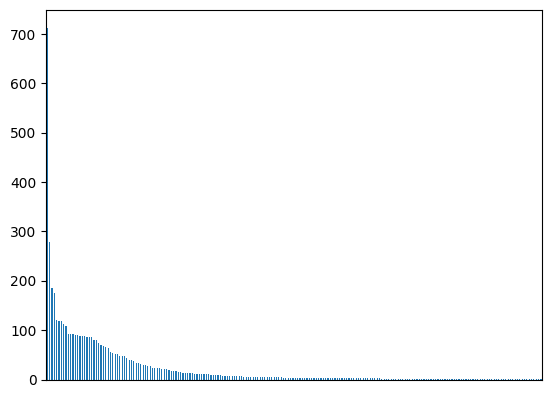

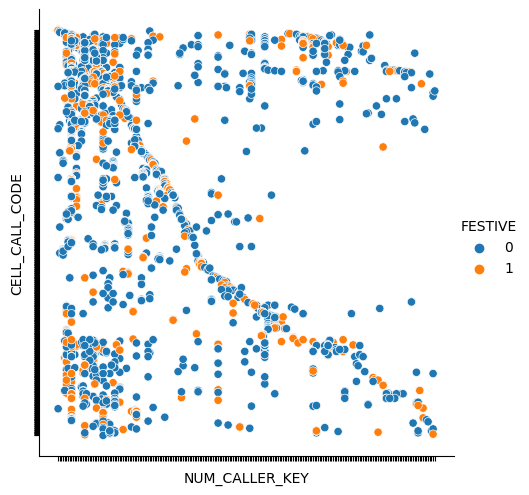

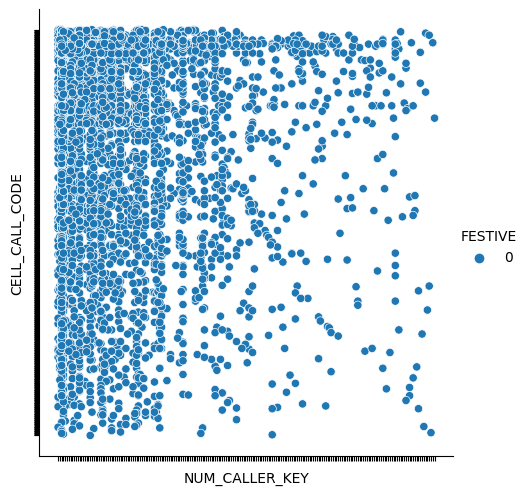


Privacy Metrics Test Aggregated Results:  0.9827586206896551
Privacy Metrics Test 1 - Elapsed Time =  0.22931650099997114

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.17611368199999333


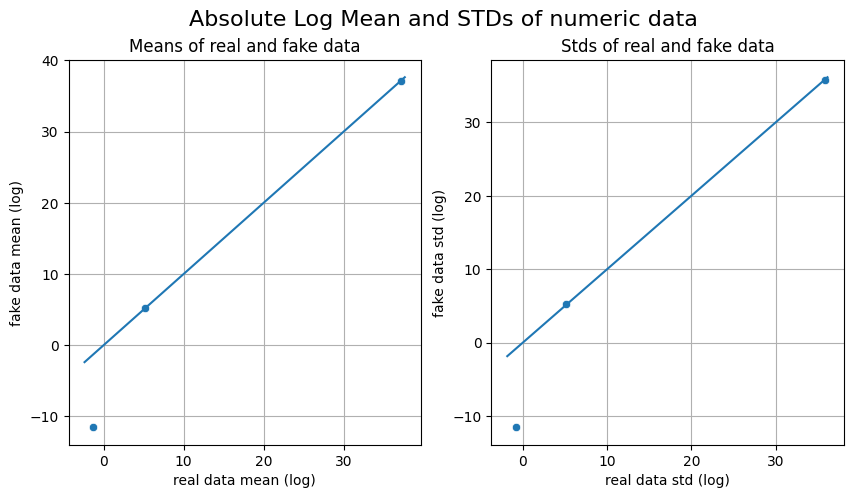

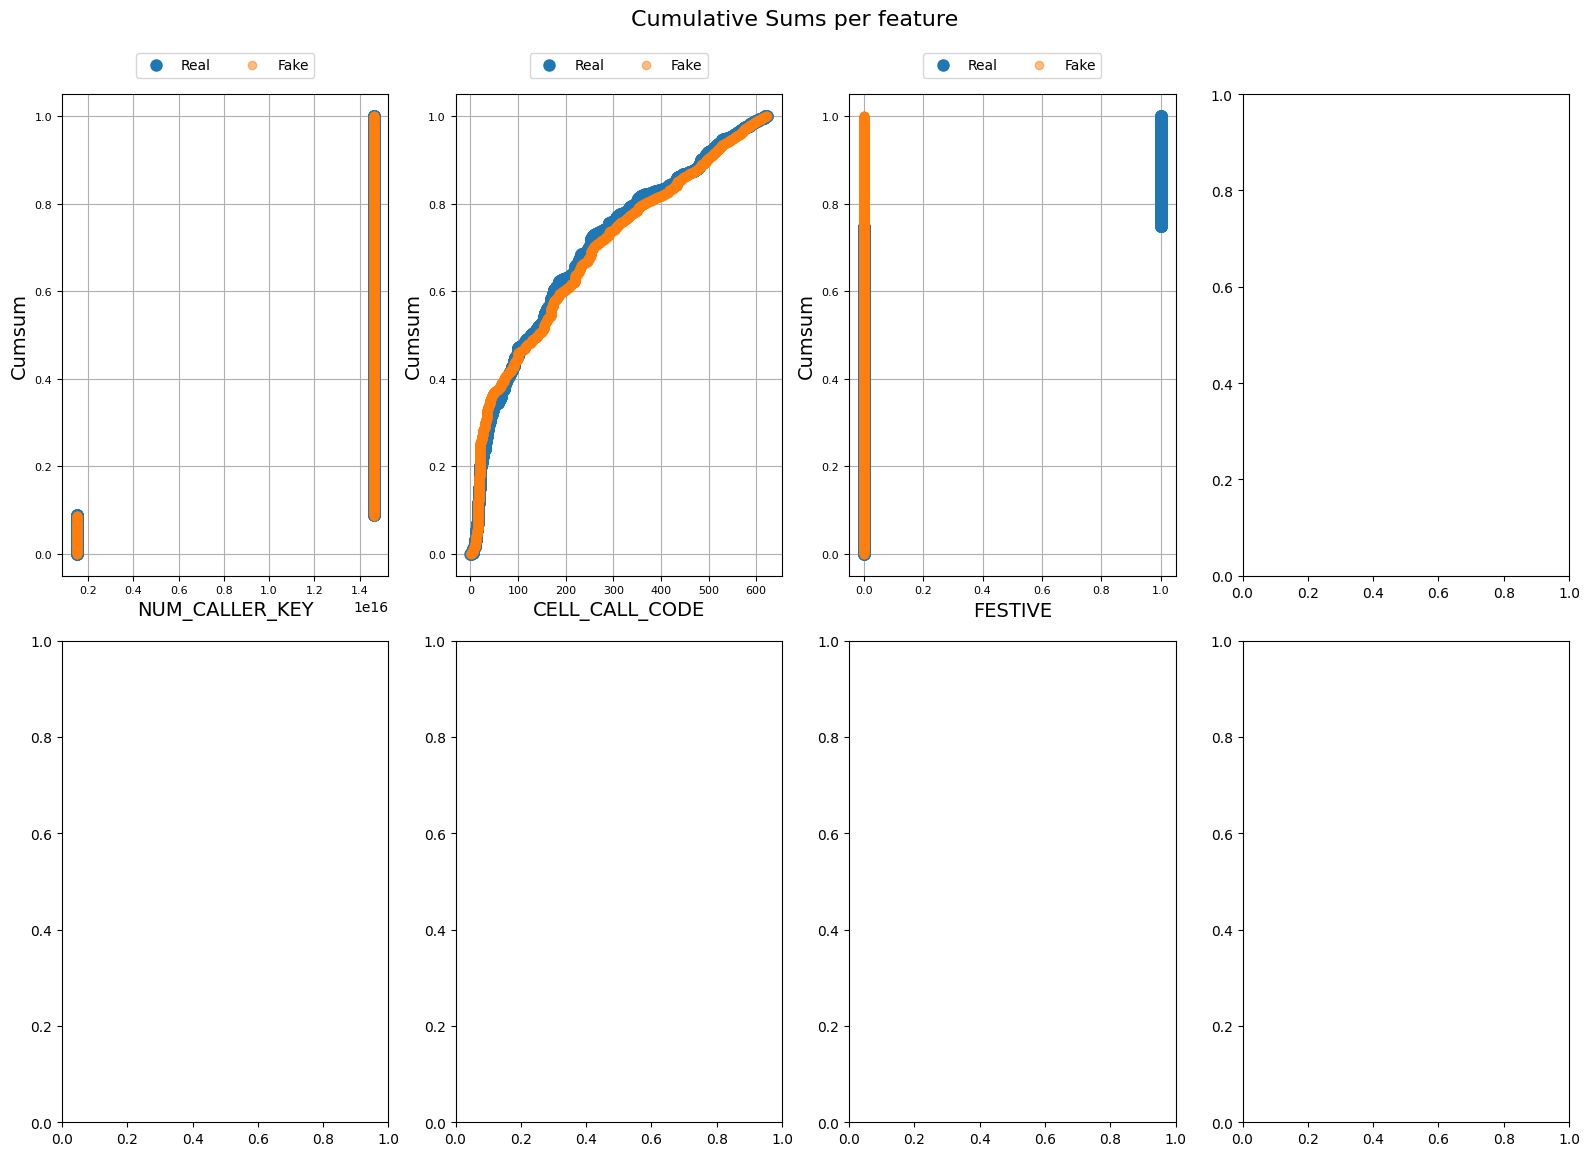

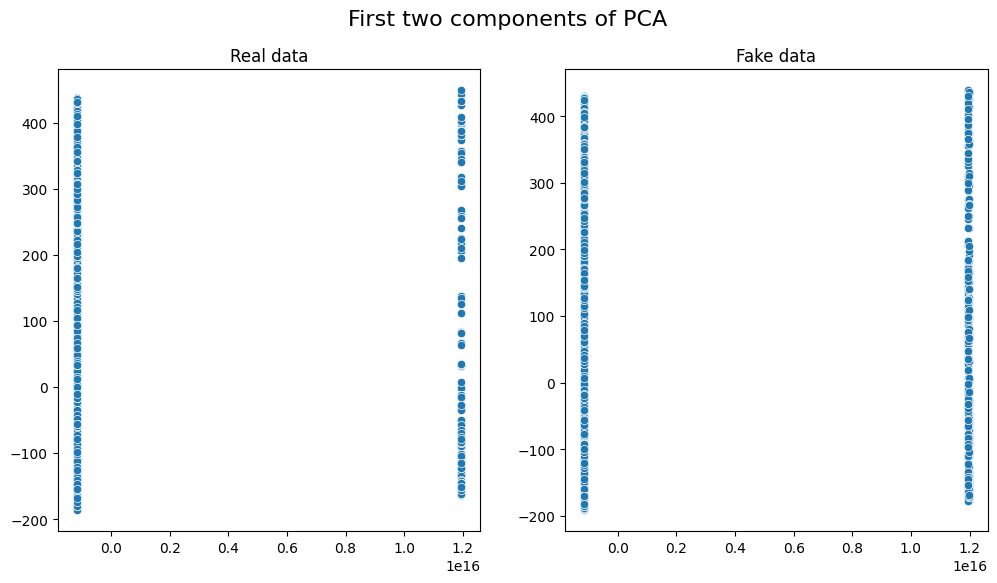


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_5000_data_points
10000 Original Data Read.
5000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


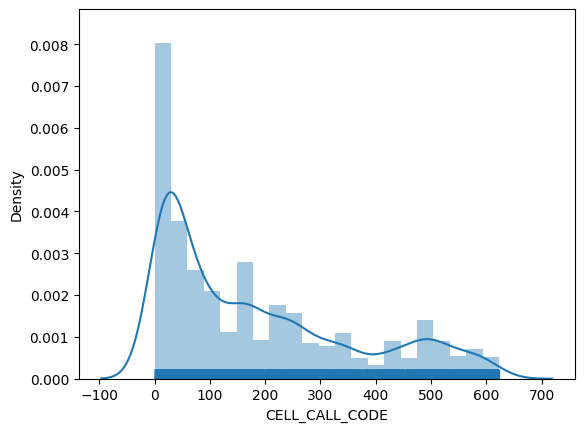

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


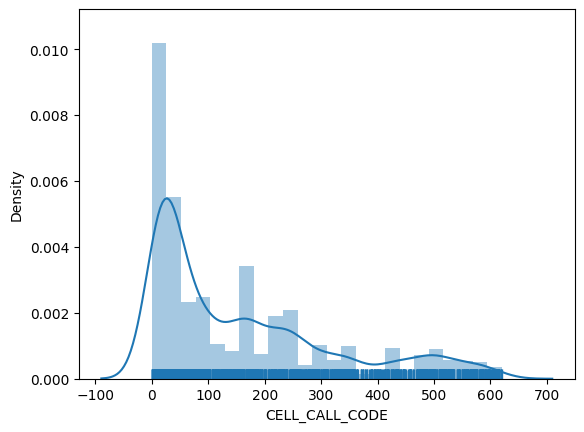

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


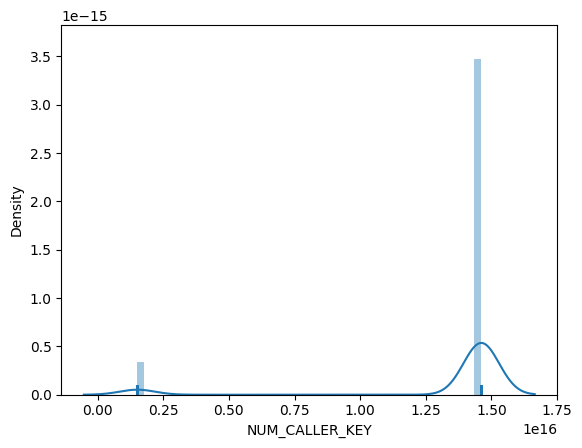

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


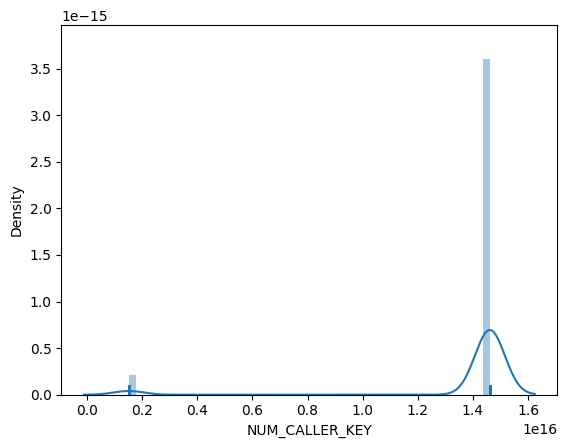

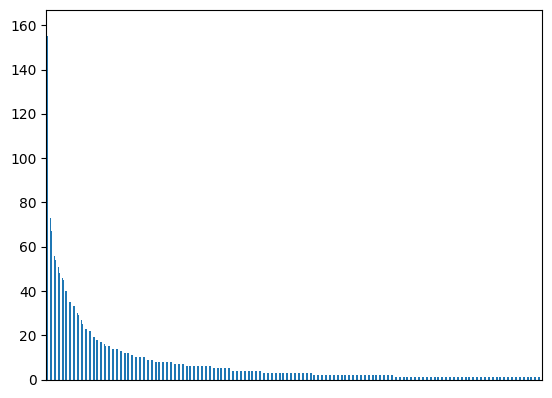

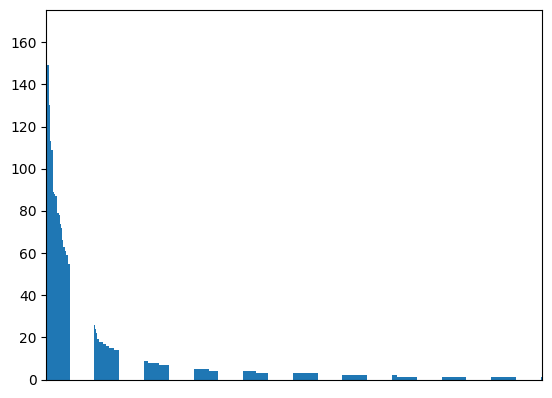

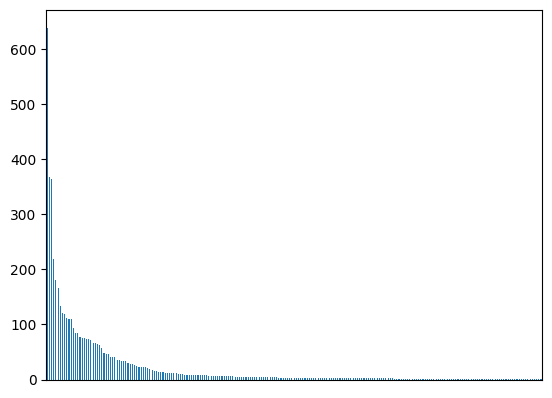

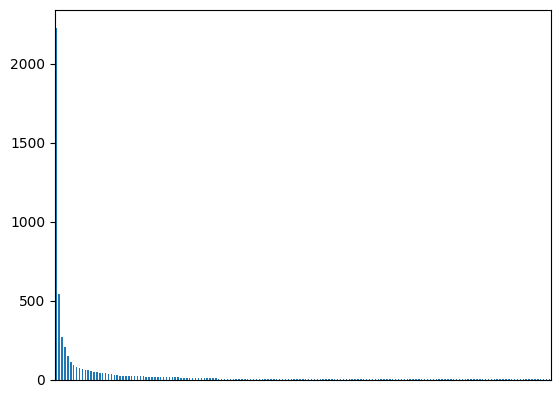

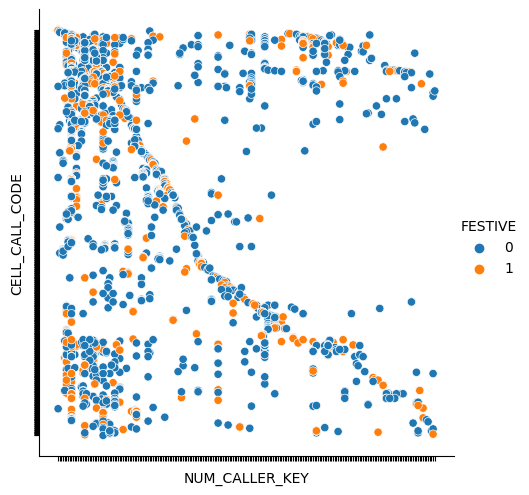

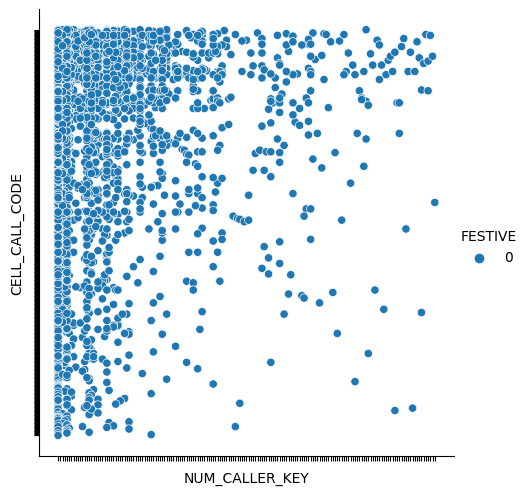


Privacy Metrics Test Aggregated Results:  0.9466666666666667
Privacy Metrics Test 1 - Elapsed Time =  0.22297586899998123

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.1796377180000377


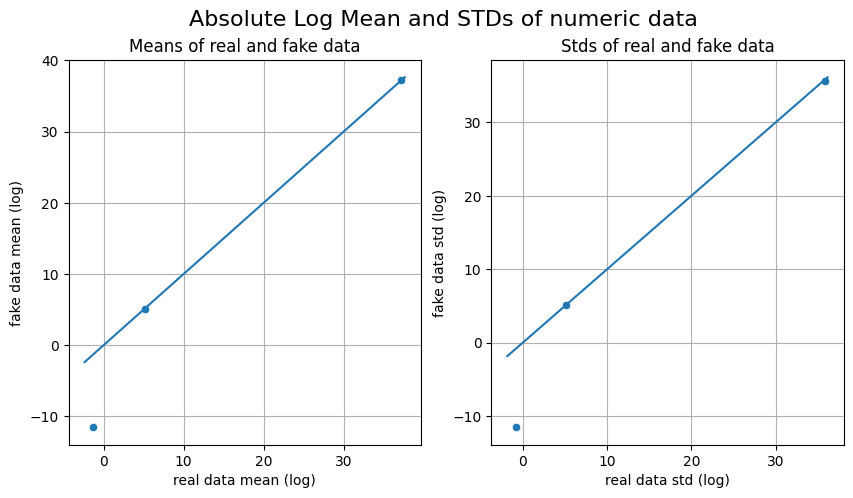

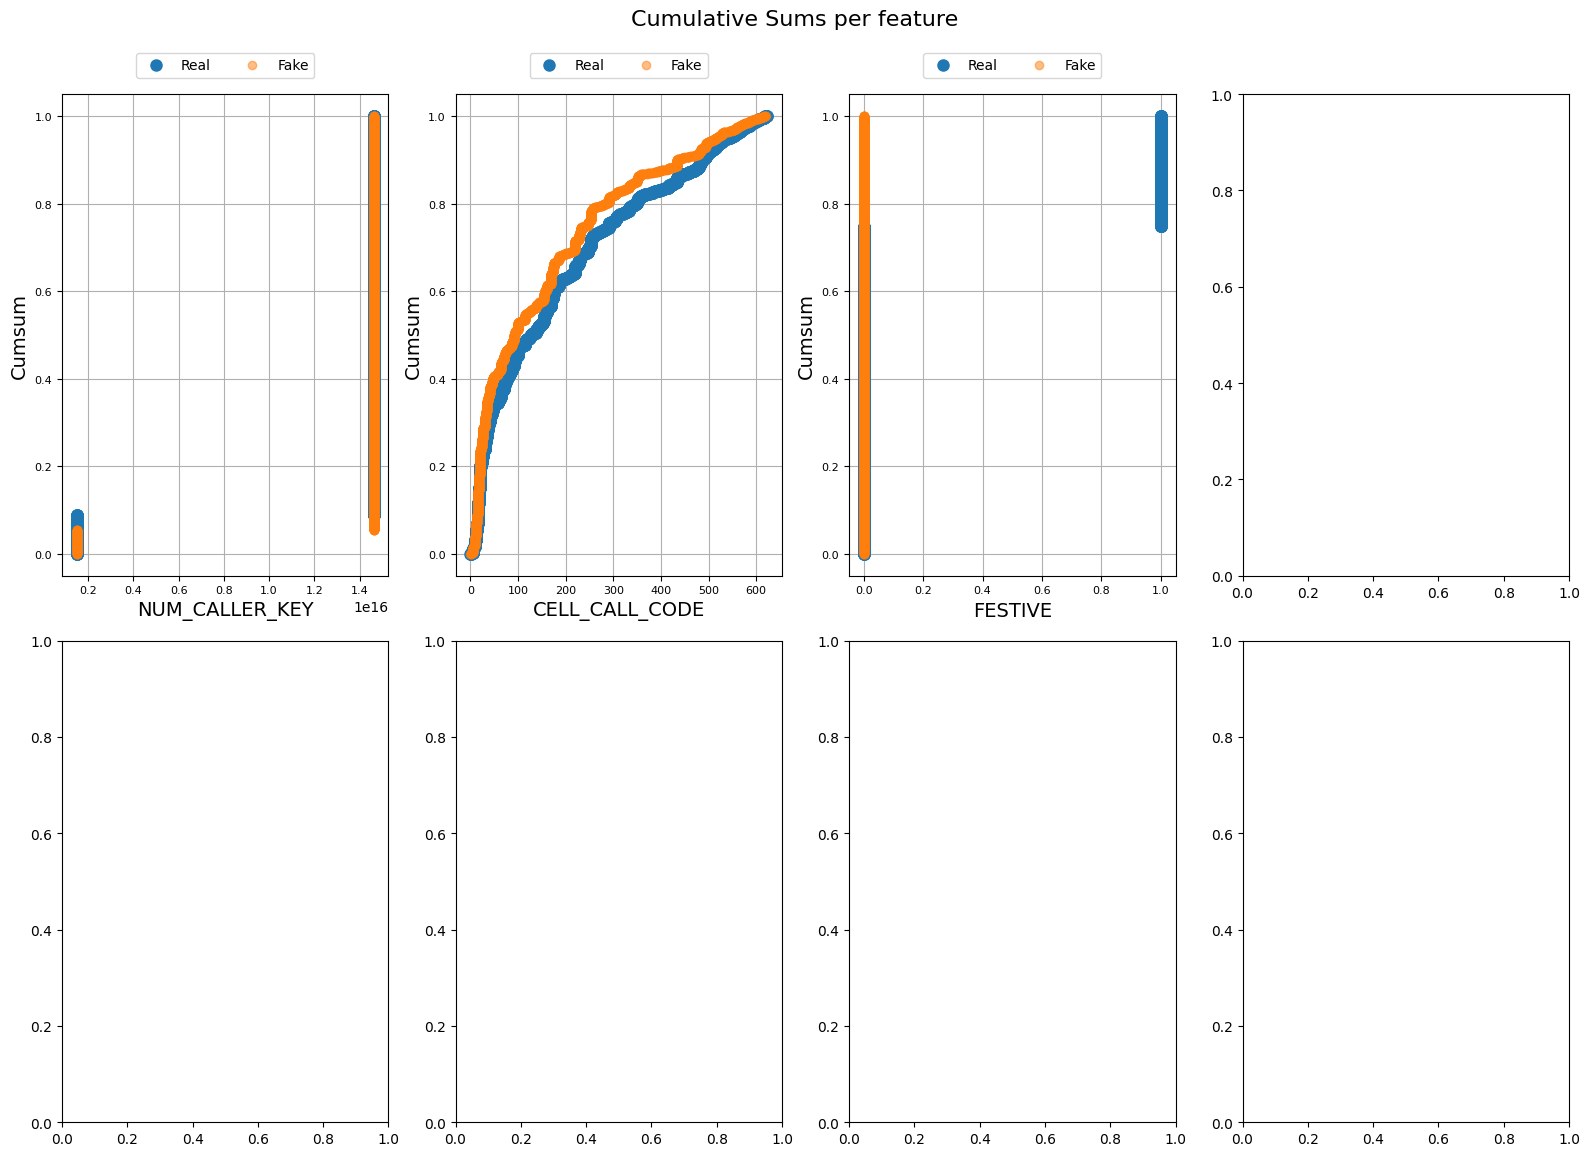

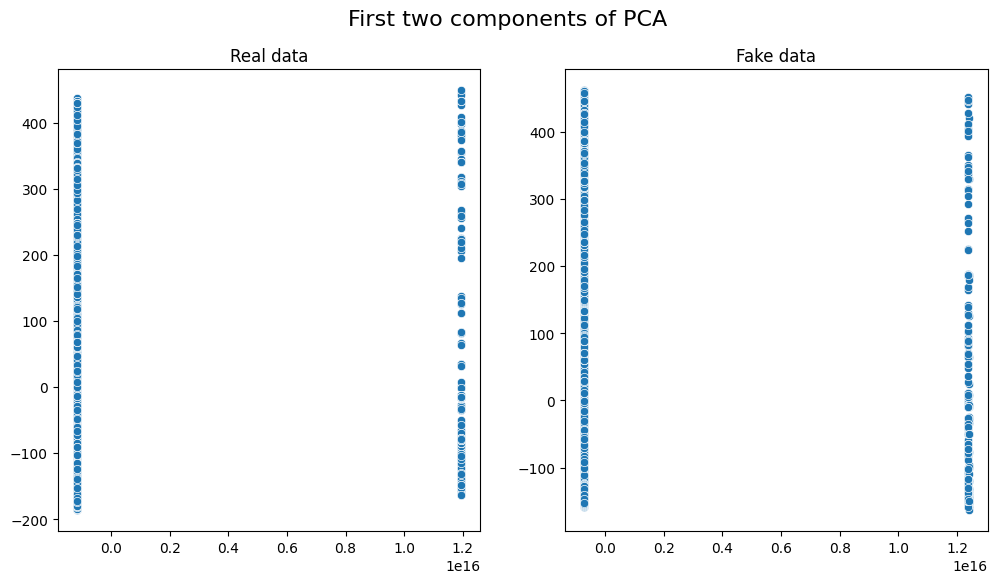


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_6000_data_points
10000 Original Data Read.
6000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


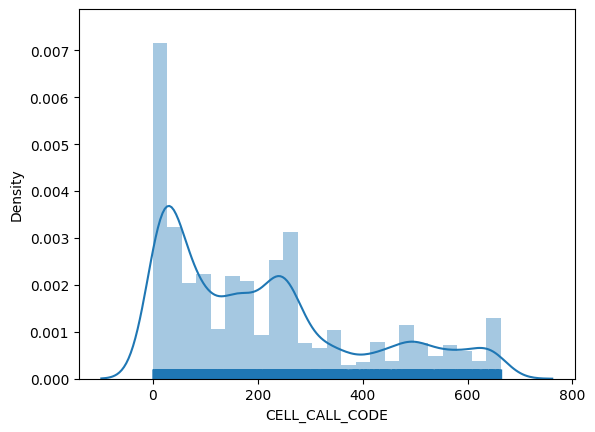

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


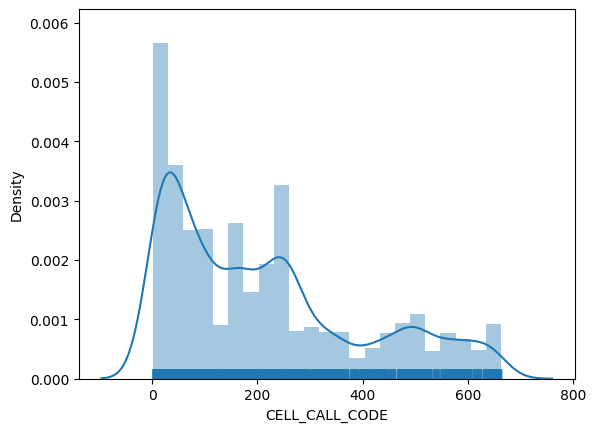

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


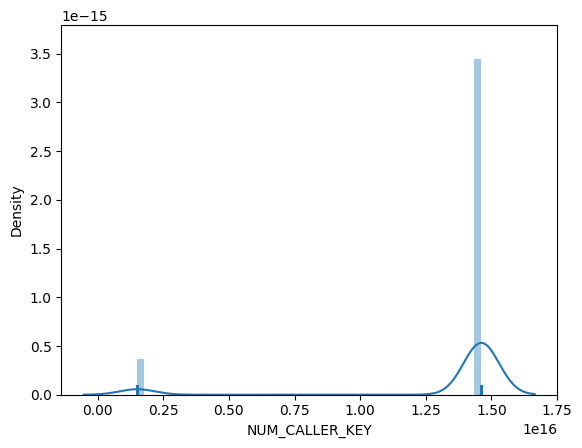

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


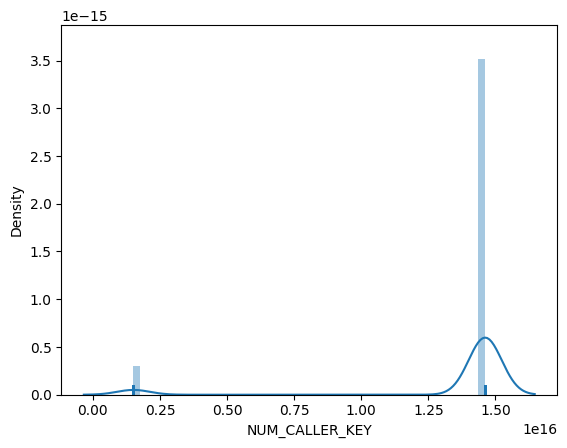

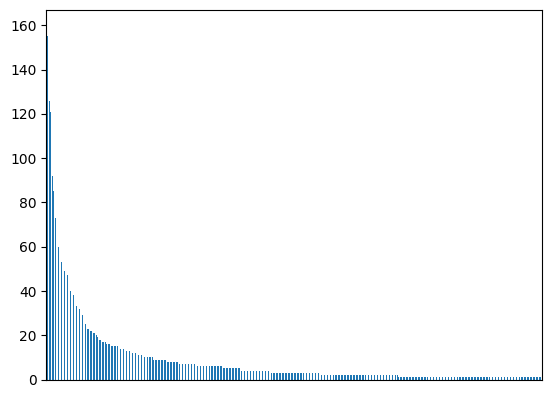

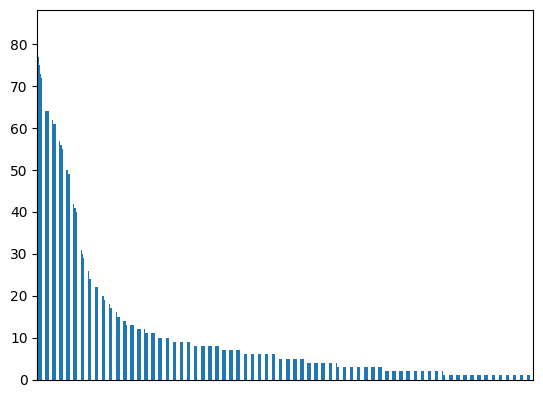

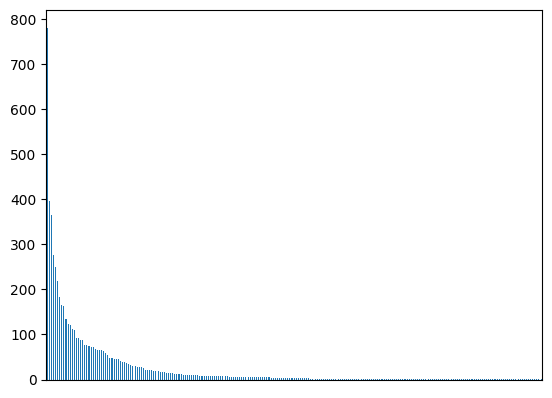

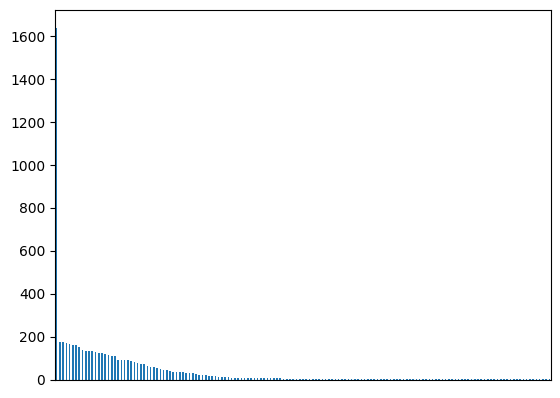

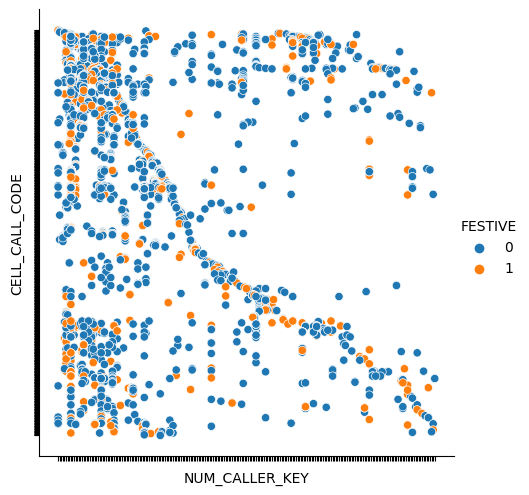

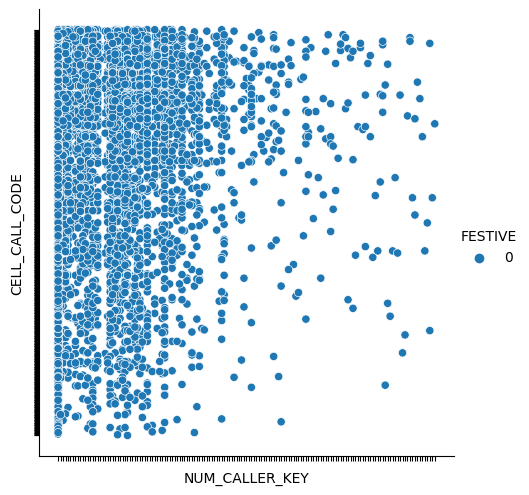


Privacy Metrics Test Aggregated Results:  0.9864864864864865
Privacy Metrics Test 1 - Elapsed Time =  0.21874938899998142

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.18652636699999903


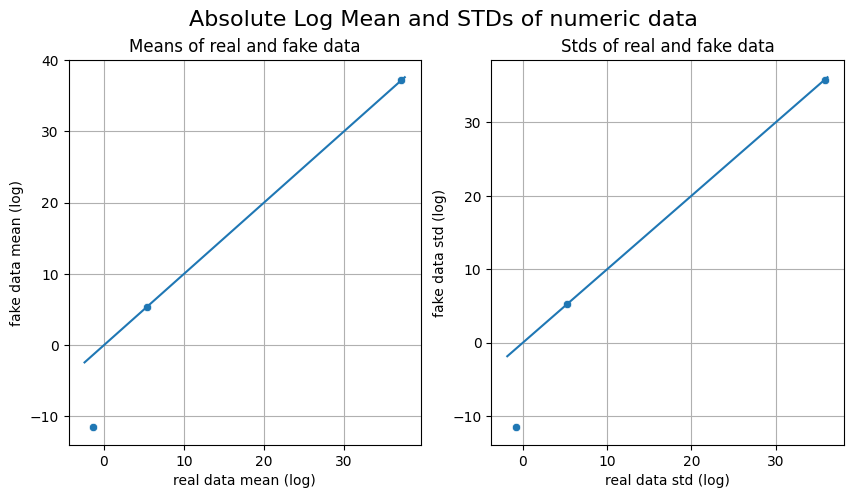

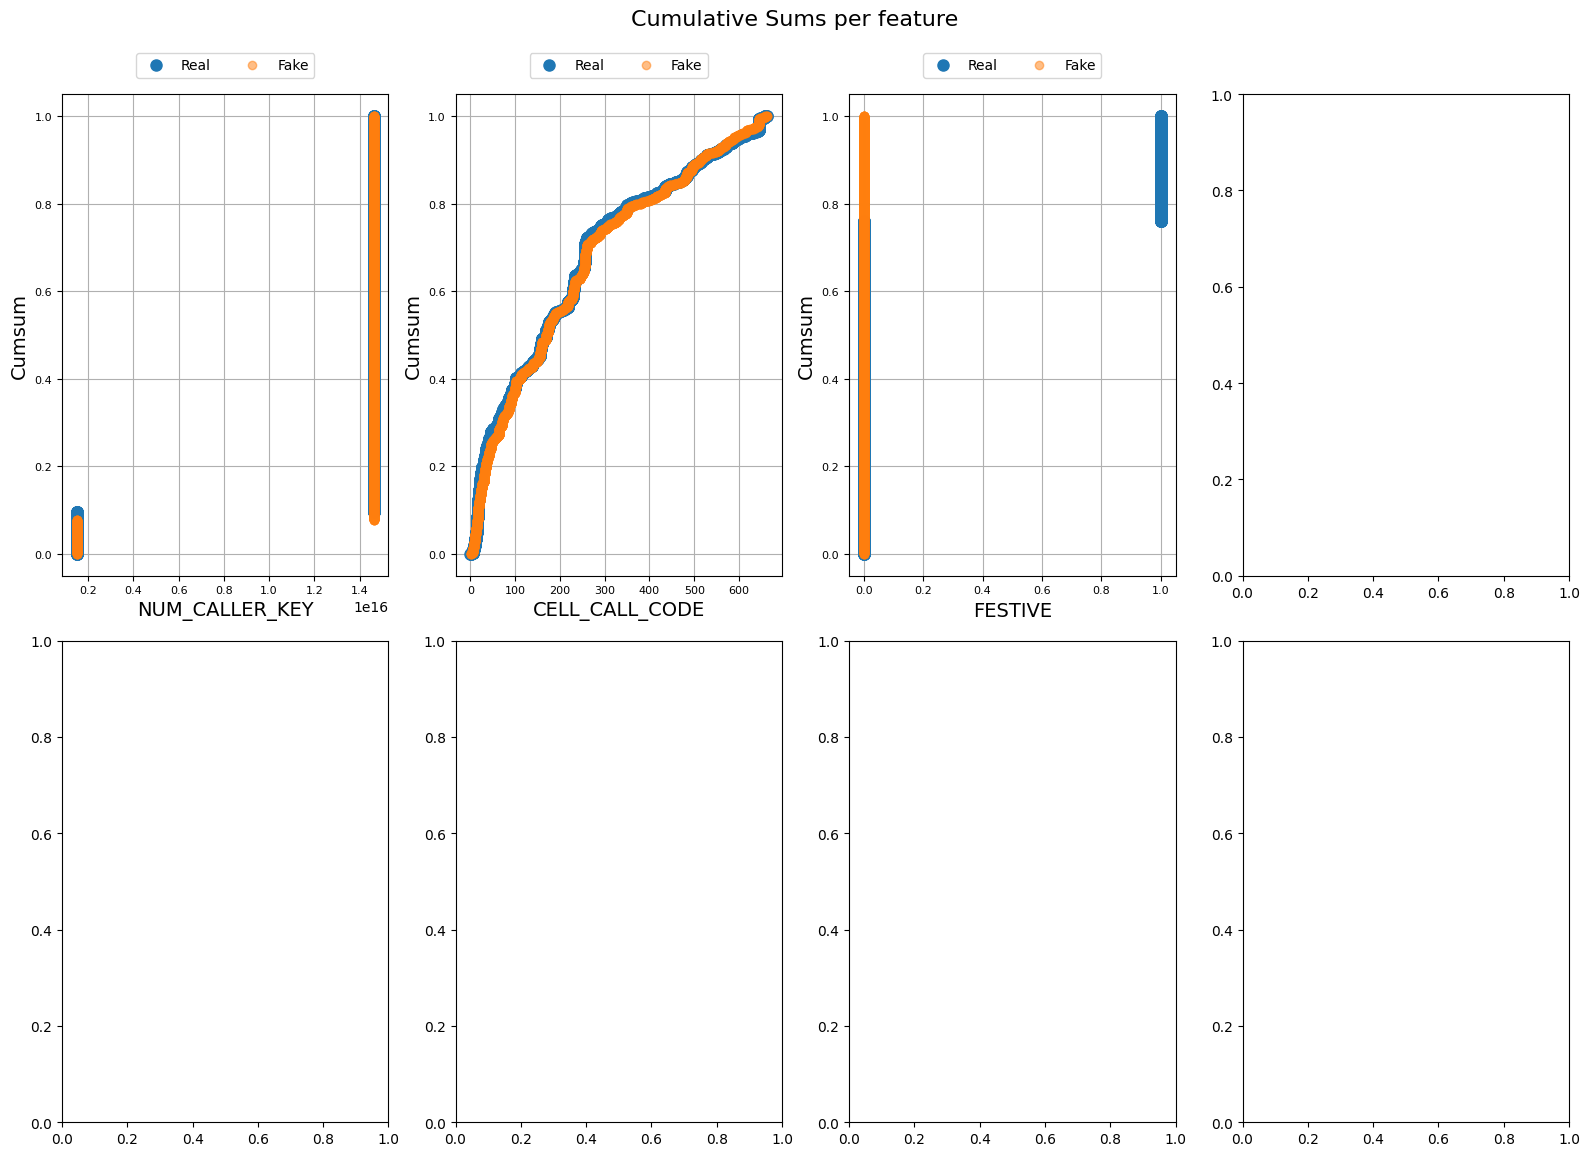

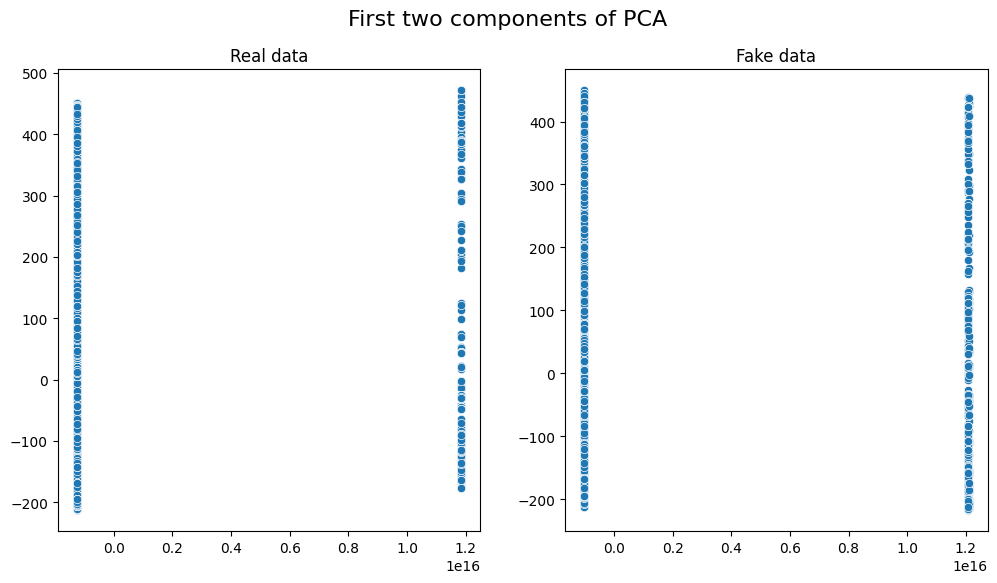


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_7000_data_points
10000 Original Data Read.
7000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


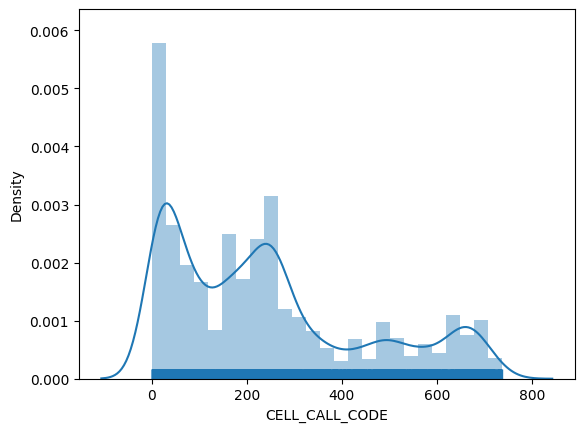

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


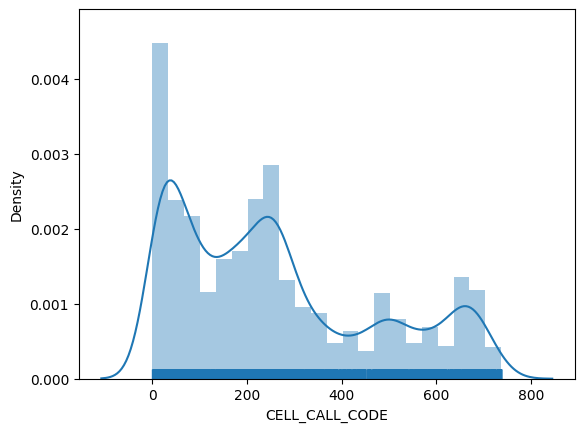

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


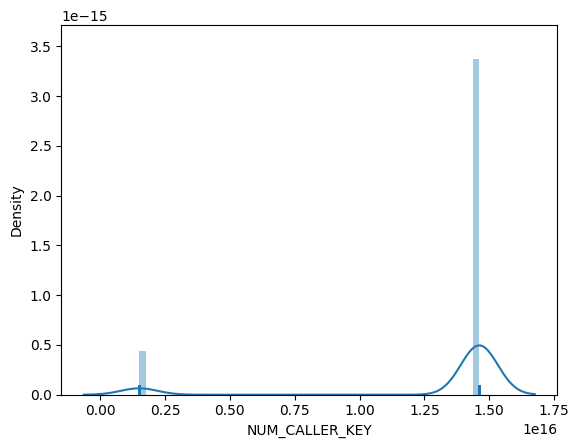

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


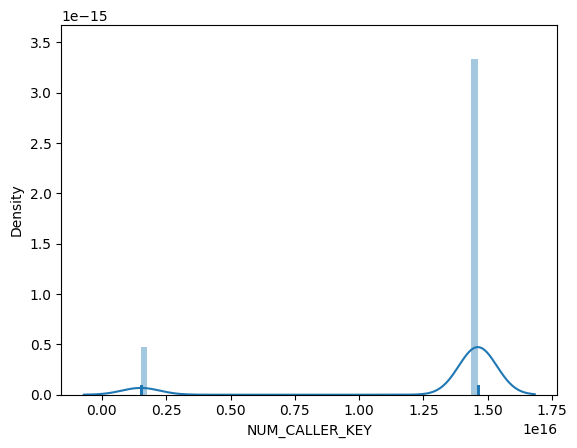

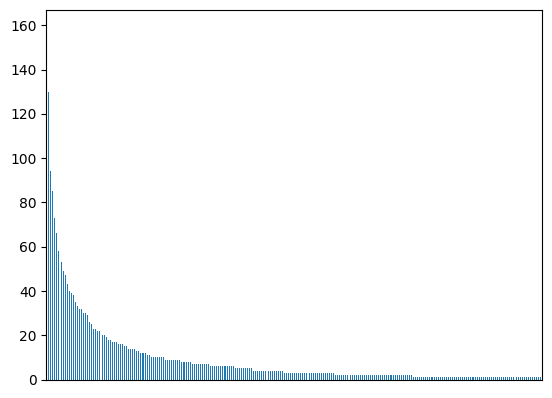

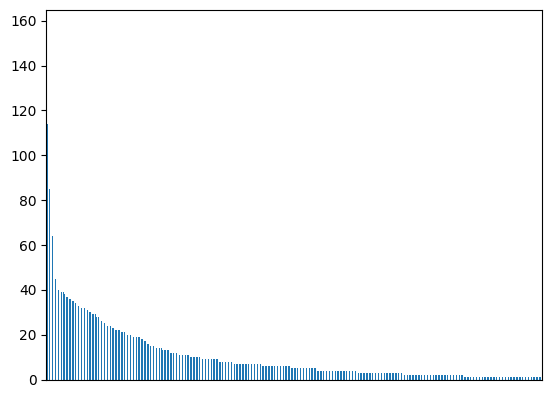

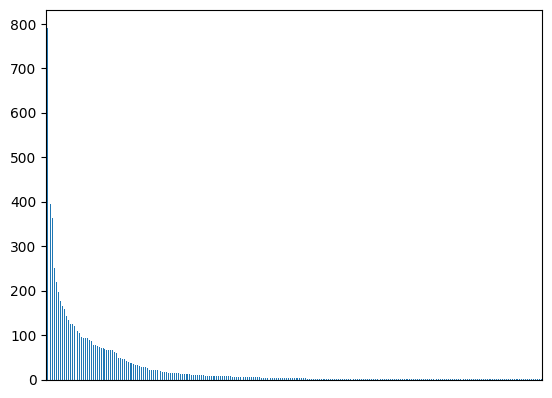

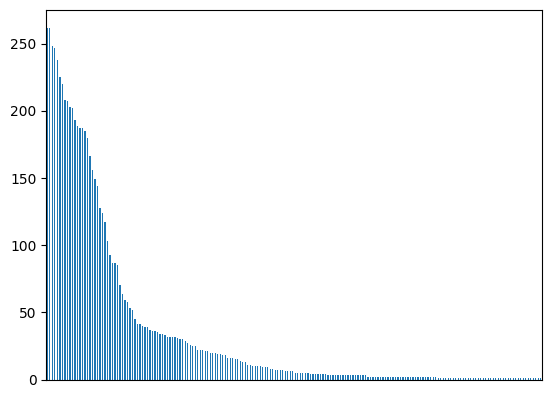

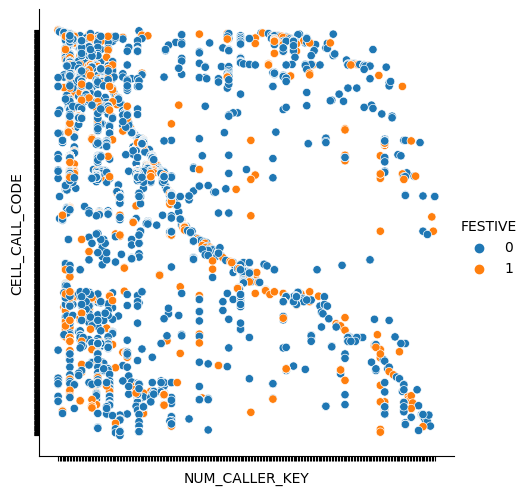

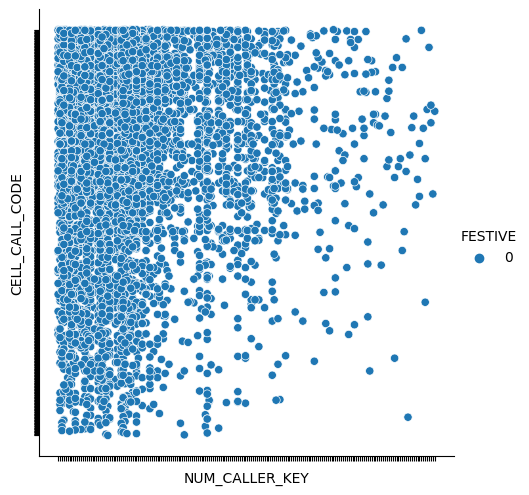


Privacy Metrics Test Aggregated Results:  0.9759036144578314
Privacy Metrics Test 1 - Elapsed Time =  0.22832719600000928

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.19118434000000661


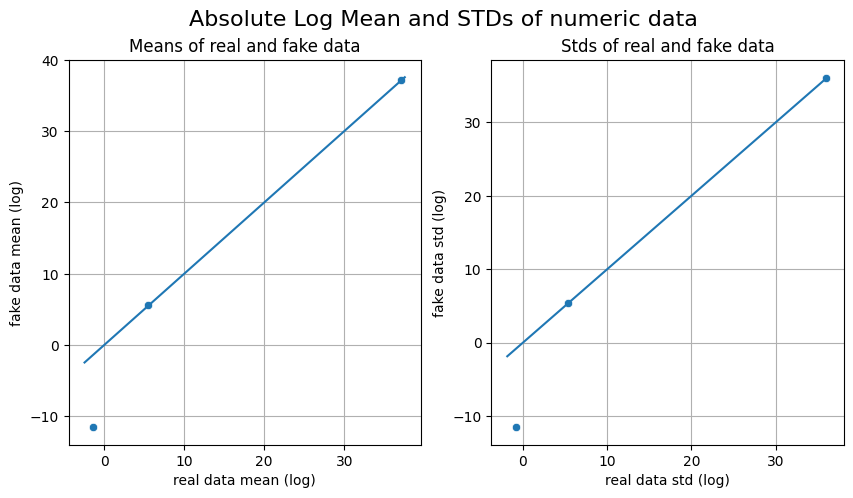

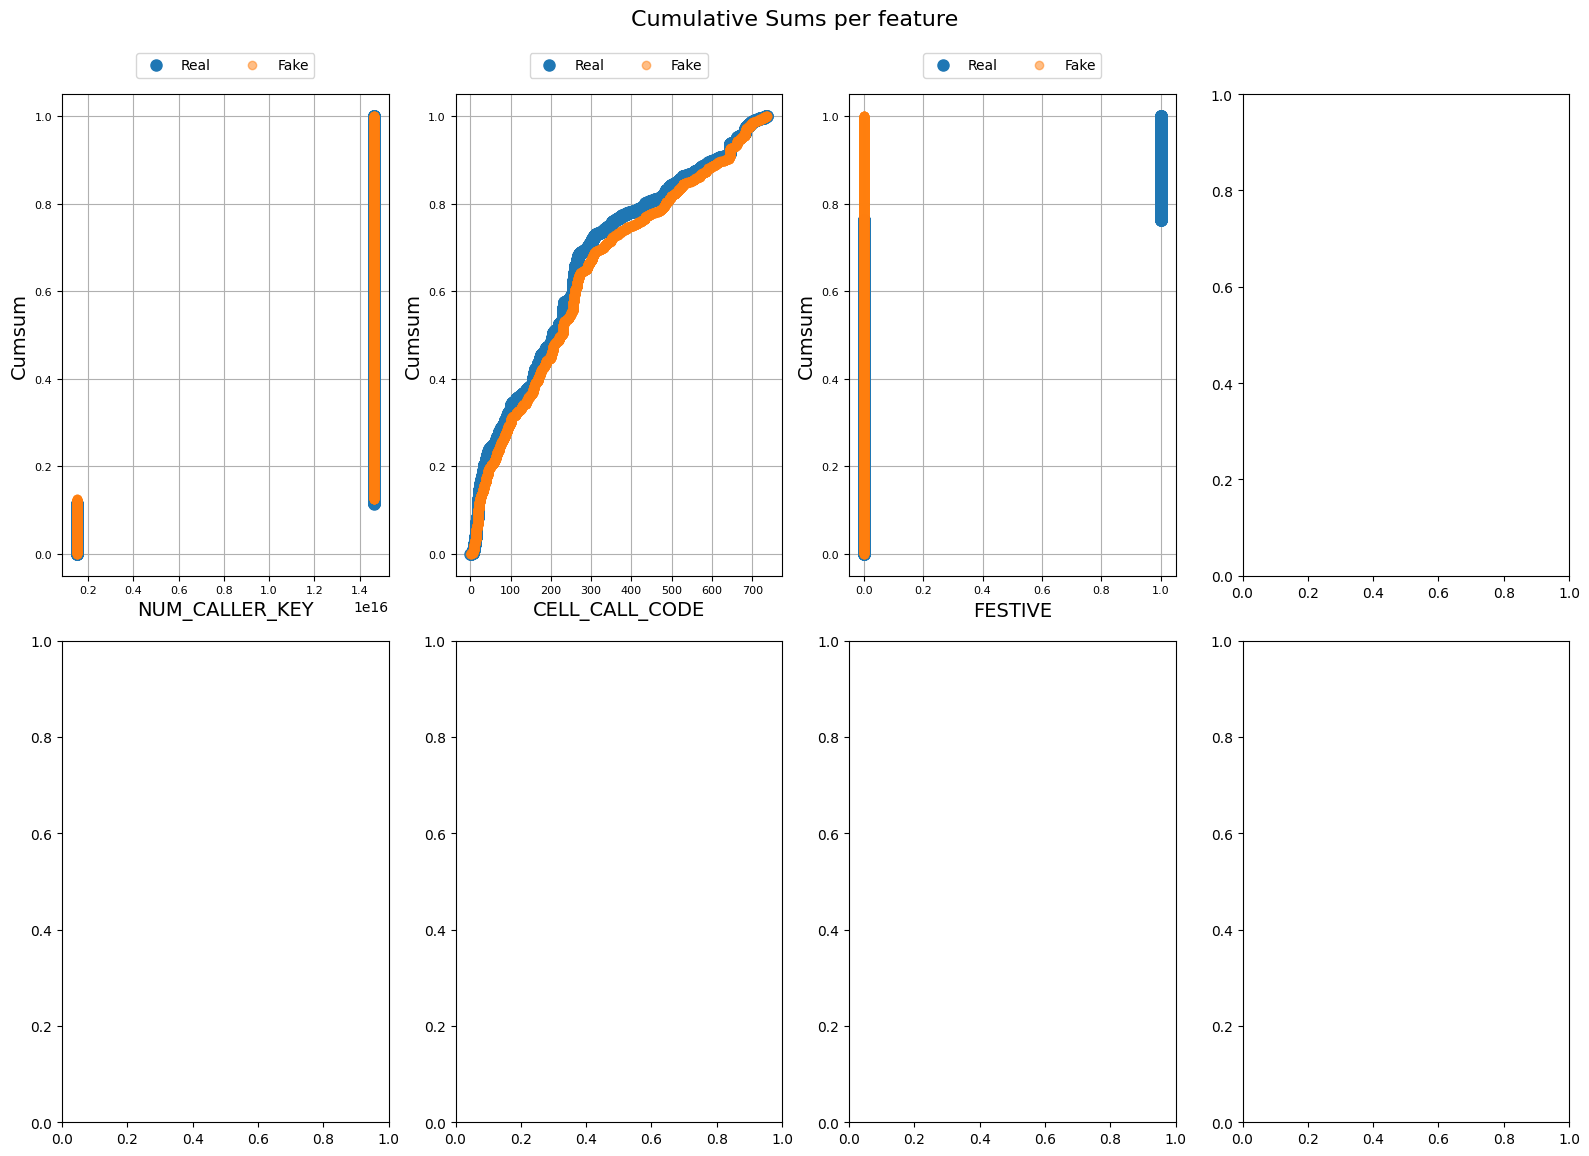

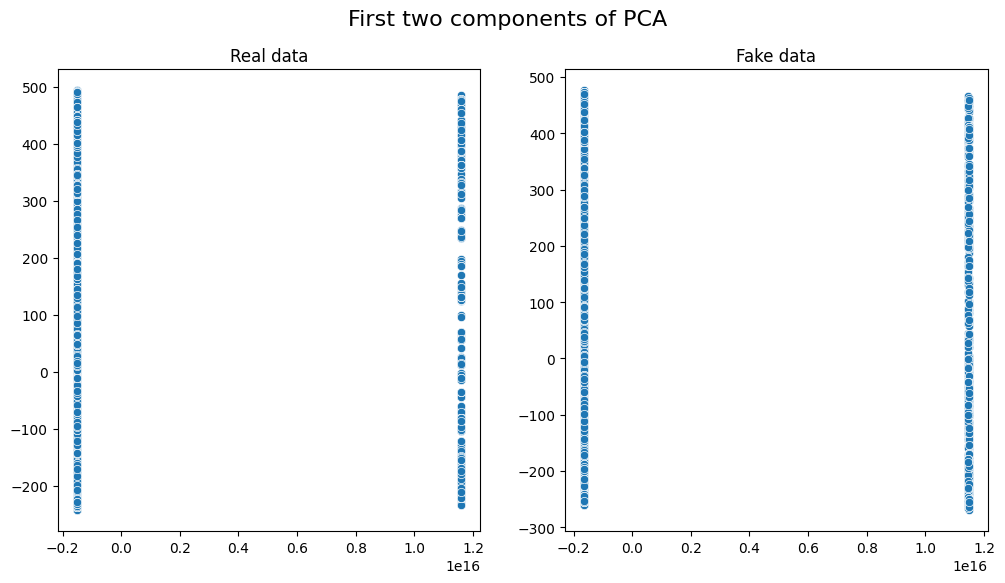


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_8000_data_points
10000 Original Data Read.
8000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


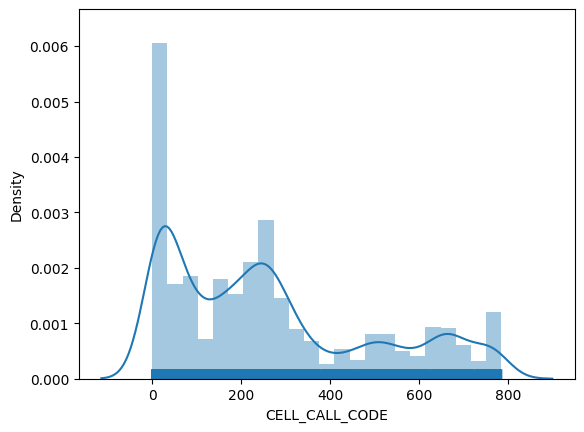

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


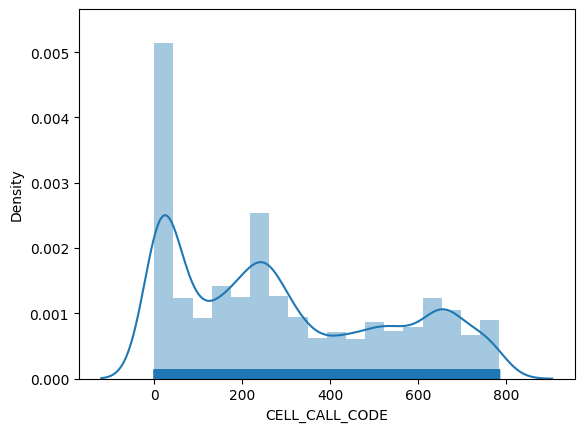

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


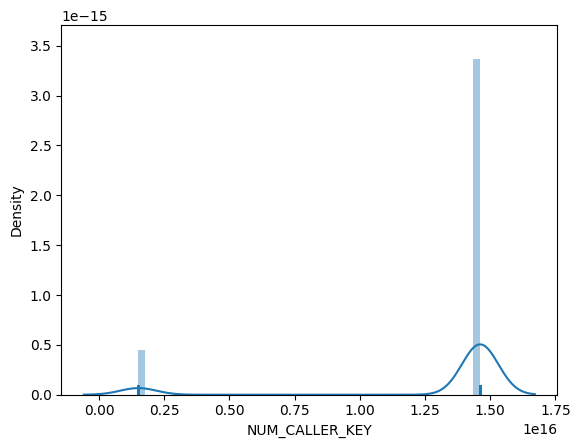

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


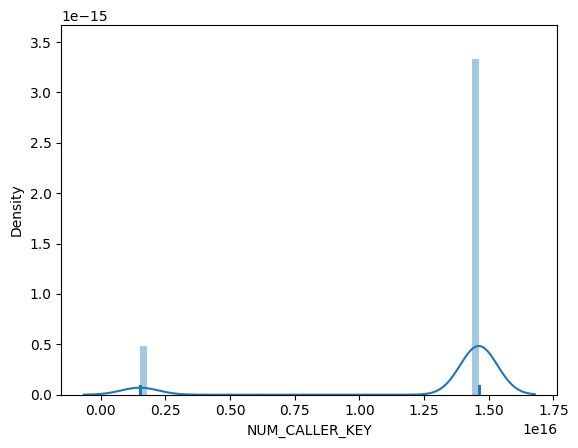

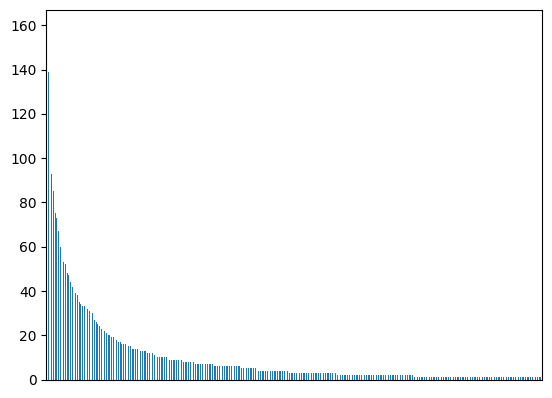

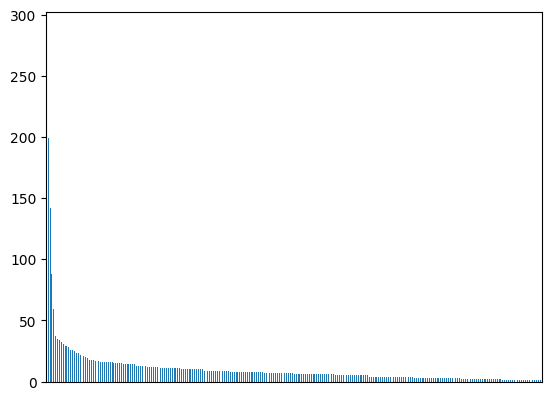

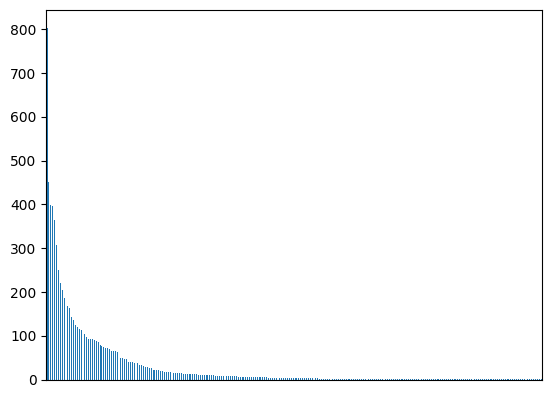

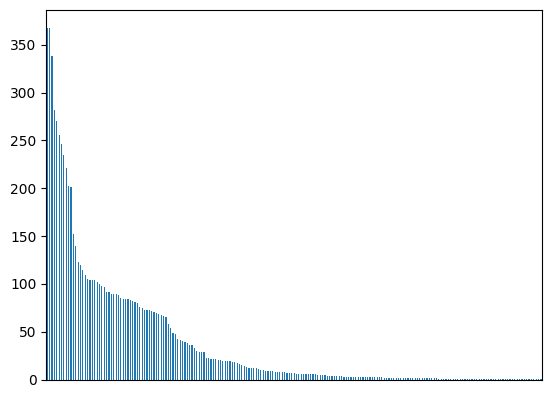

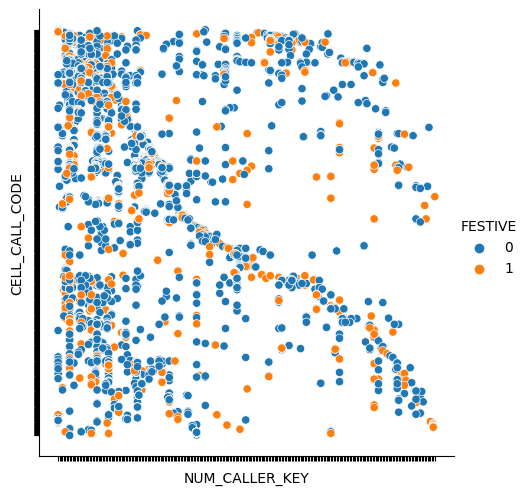

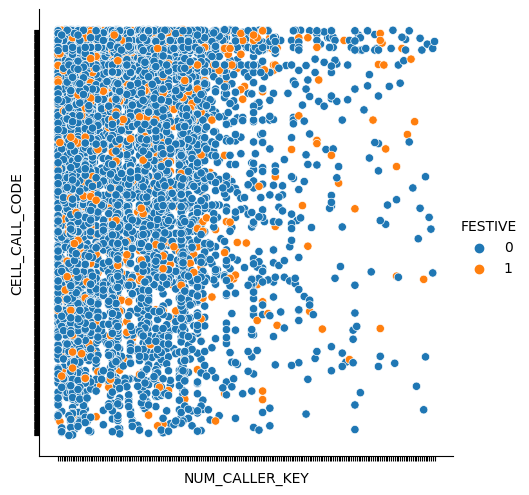


Privacy Metrics Test Aggregated Results:  0.9791666666666666
Privacy Metrics Test 1 - Elapsed Time =  0.22878260100003445

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.17729415100001233


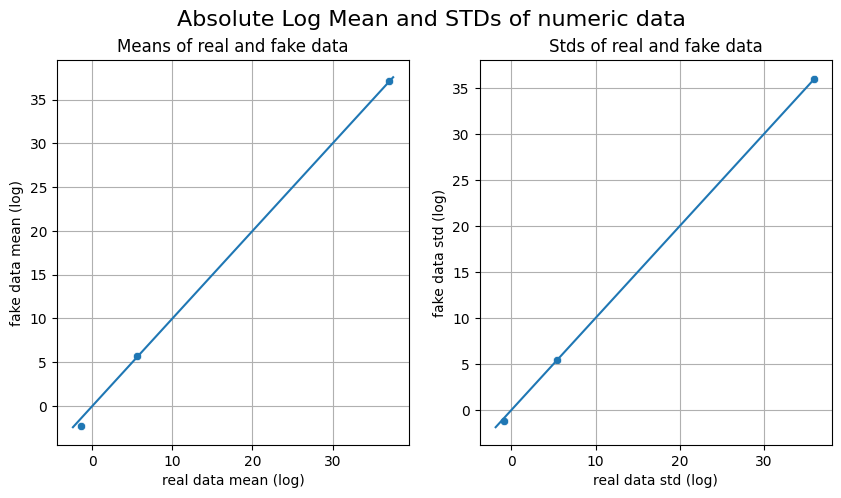

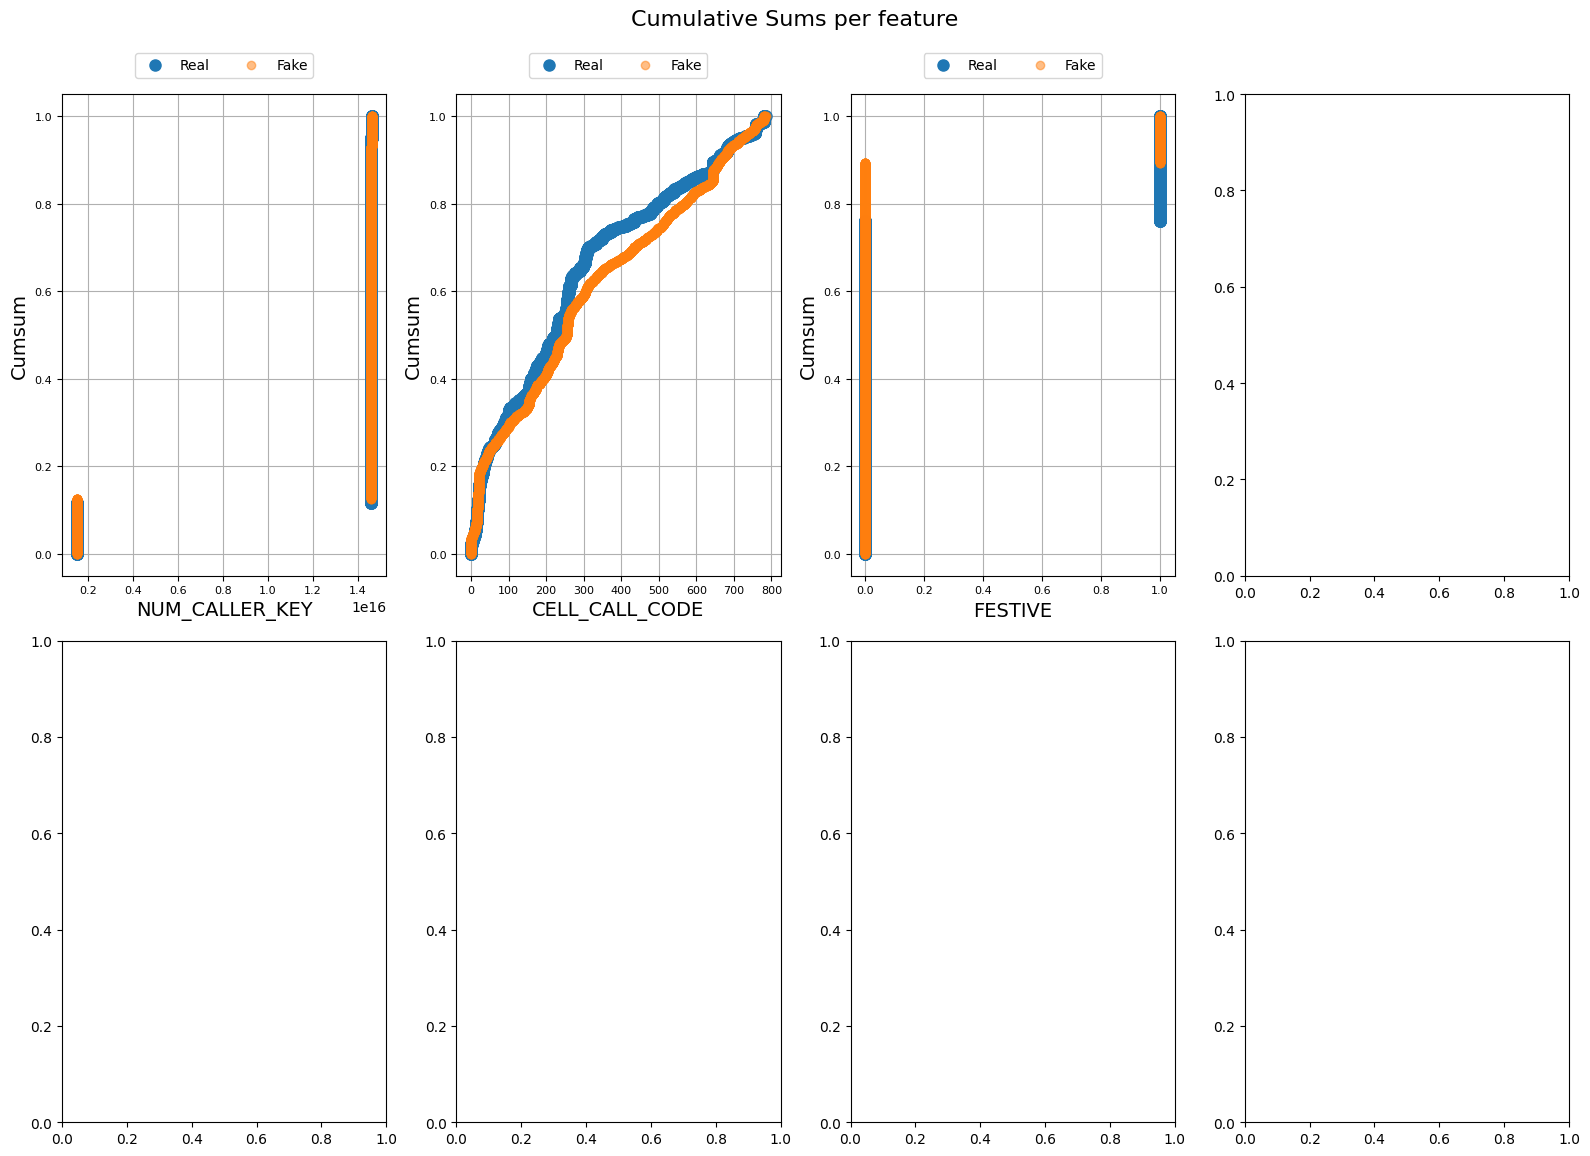

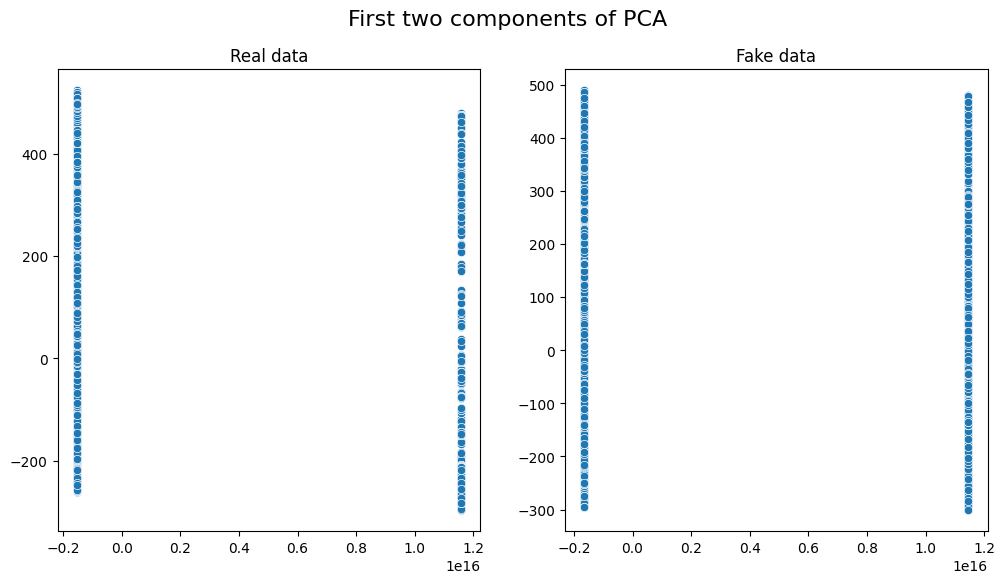


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_9000_data_points
10000 Original Data Read.
9000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


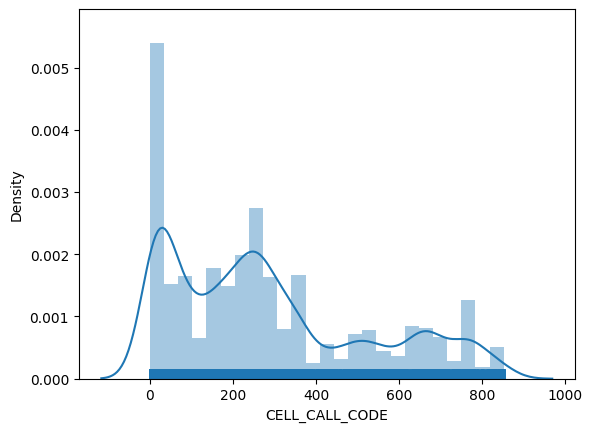

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


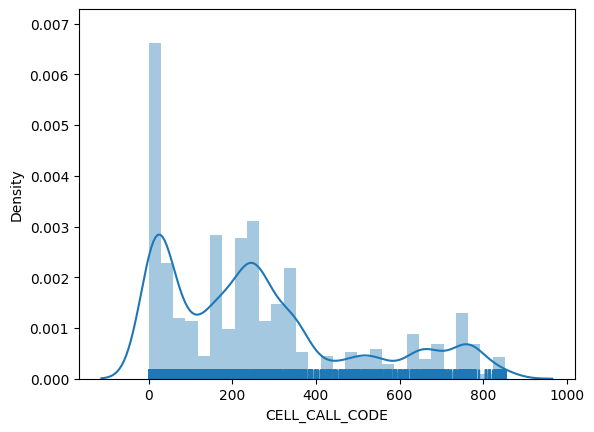

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


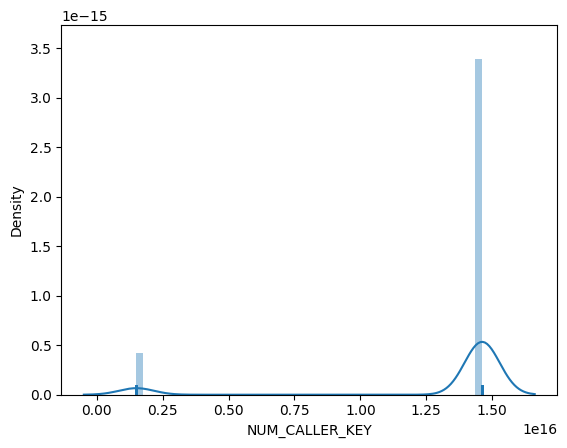

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


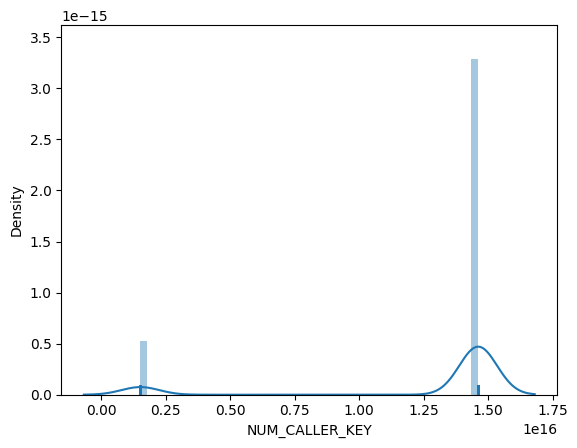

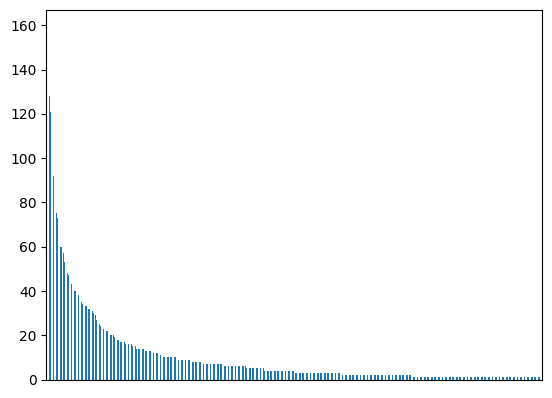

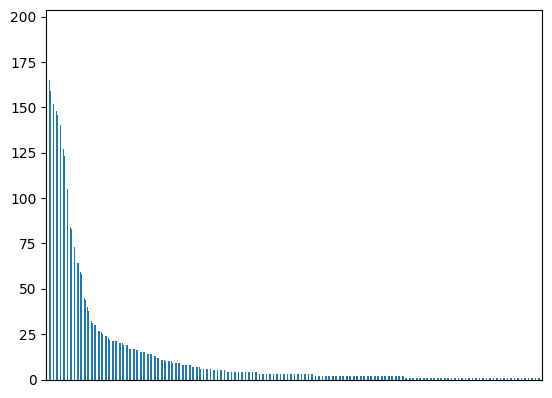

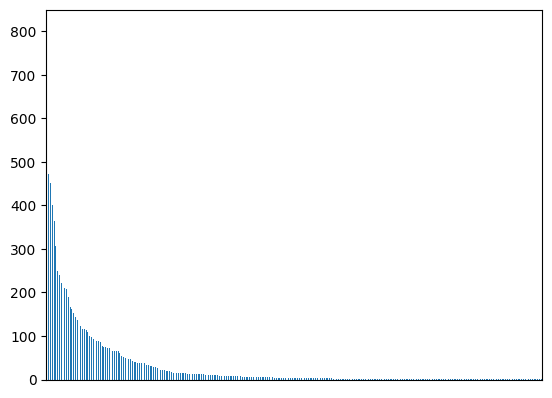

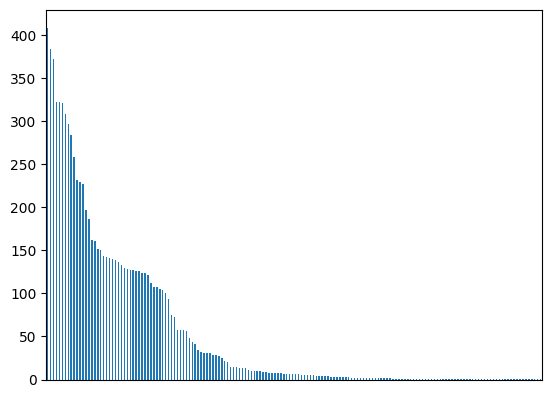

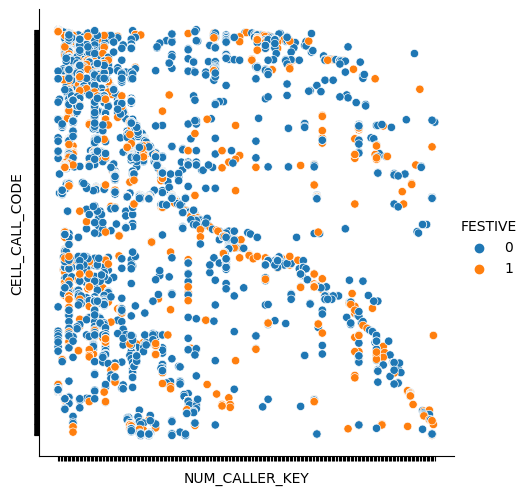

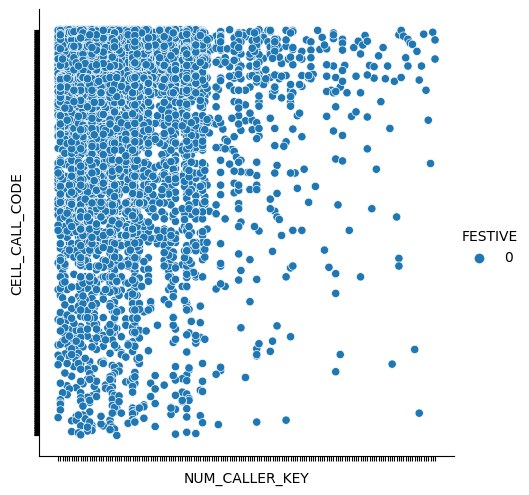


Privacy Metrics Test Aggregated Results:  0.9655172413793104
Privacy Metrics Test 1 - Elapsed Time =  0.24144852000000583

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.17671654199989462


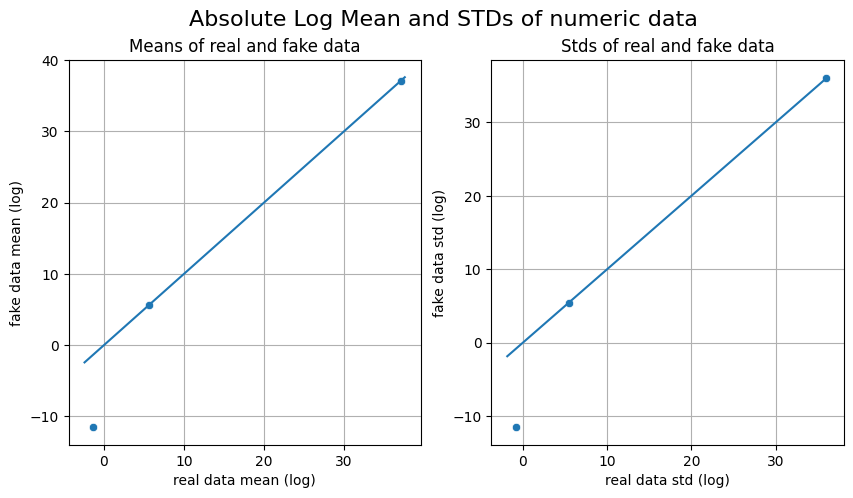

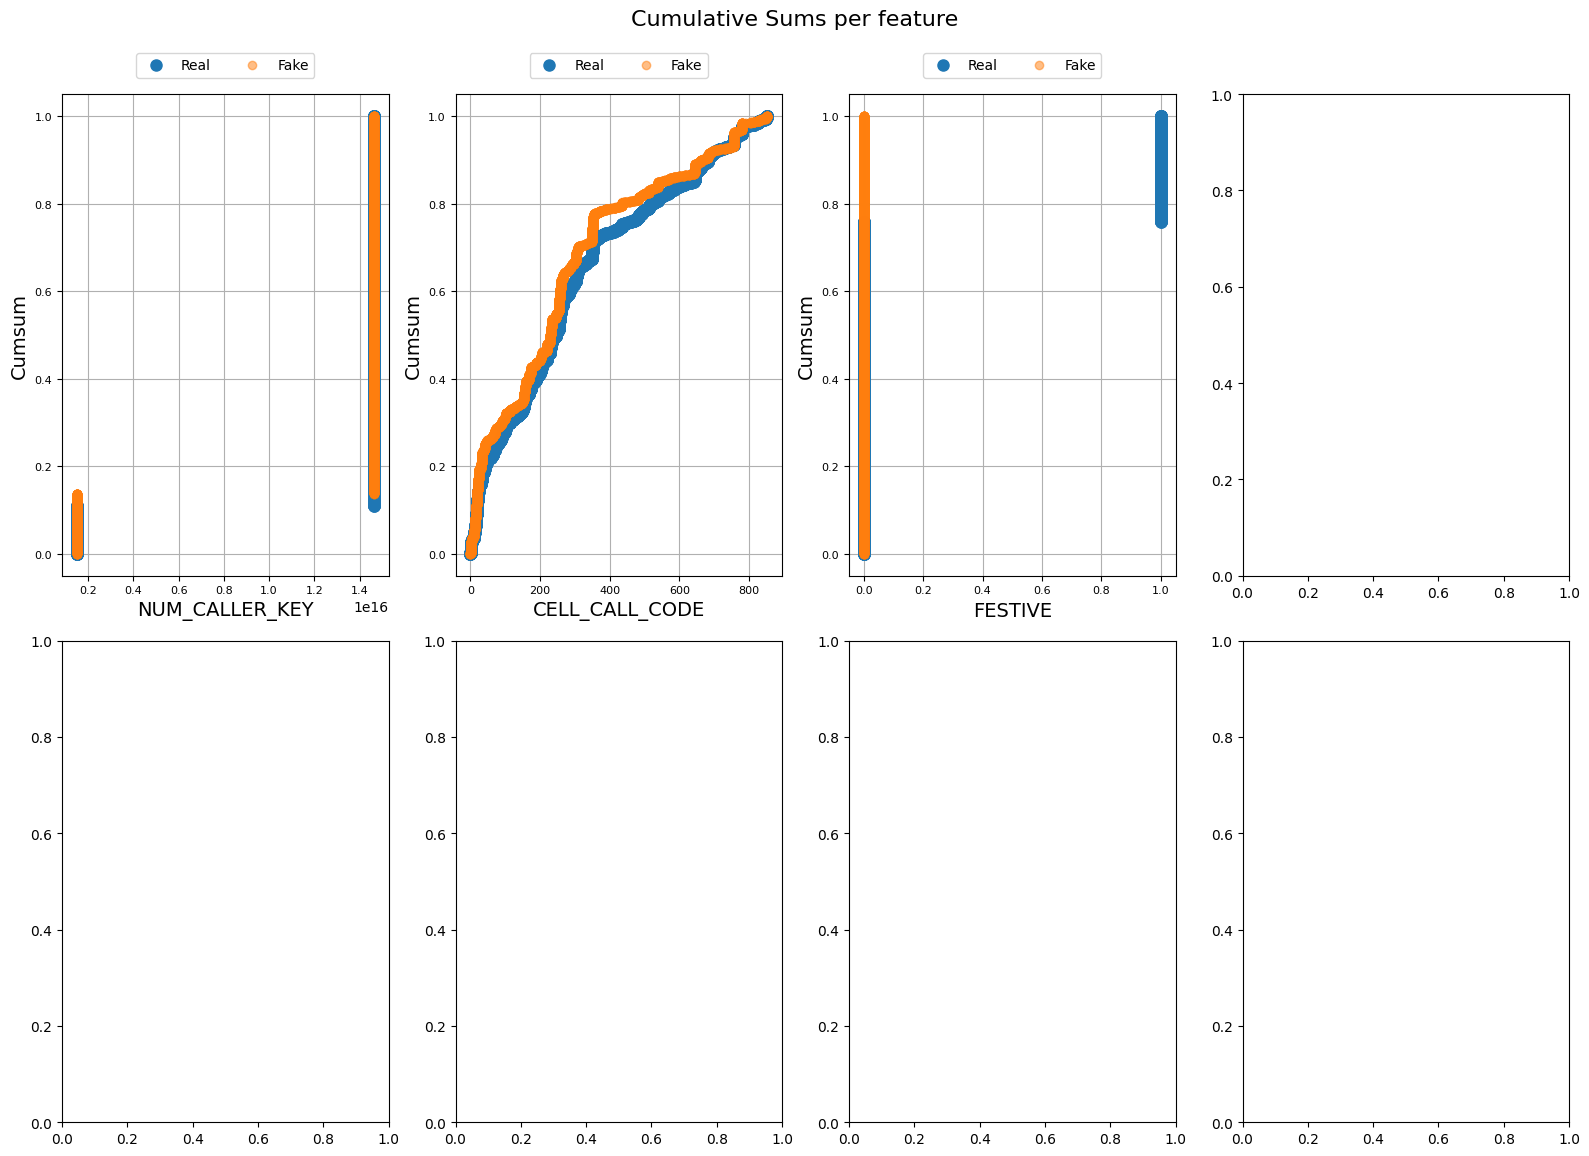

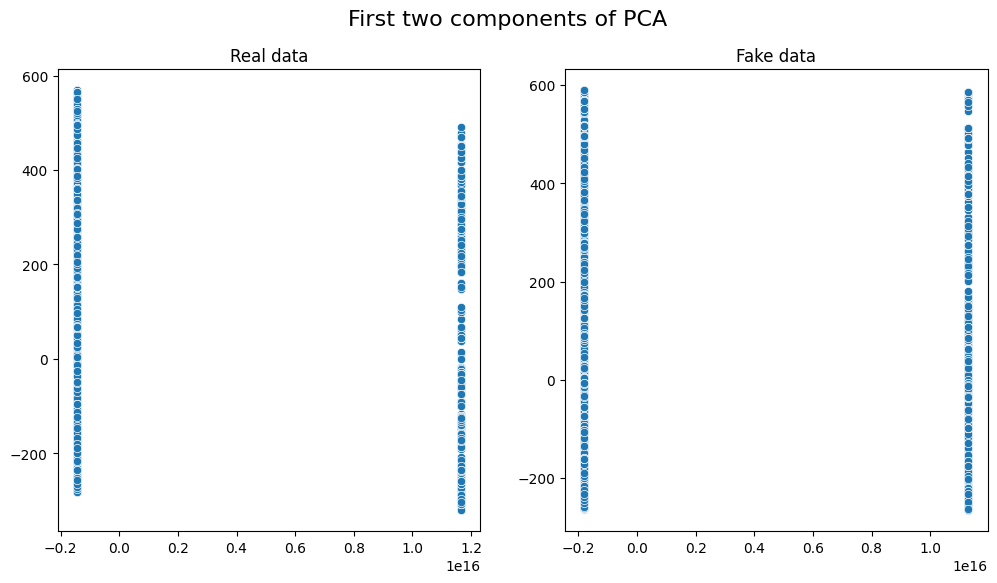


 Plots and Models saved in +'path+' folder.
Zipping...


/content/Synthetic_Data/synthetic_data/Python/Output/telephony_copulagan_500_epochs_10000_data_points
10000 Original Data Read.
10000 Synthetic Data Read.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


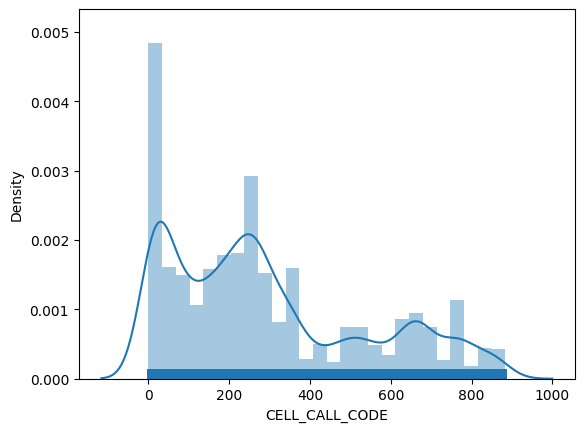

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


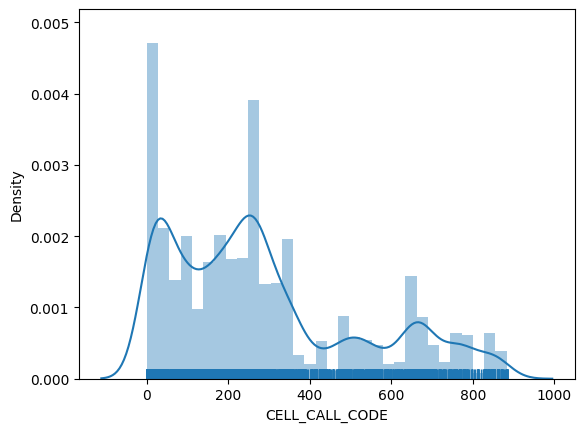

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


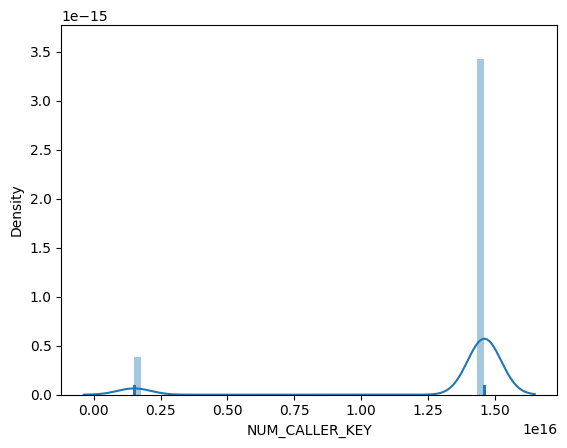

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


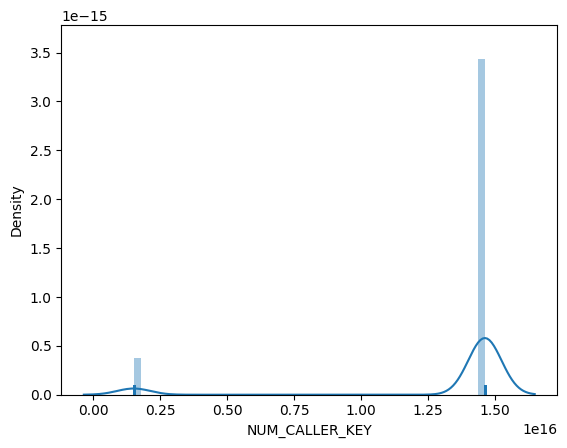

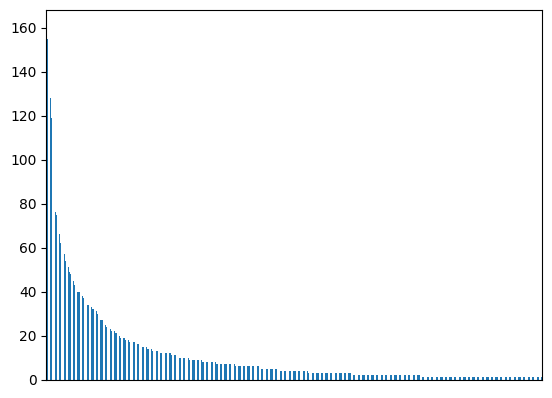

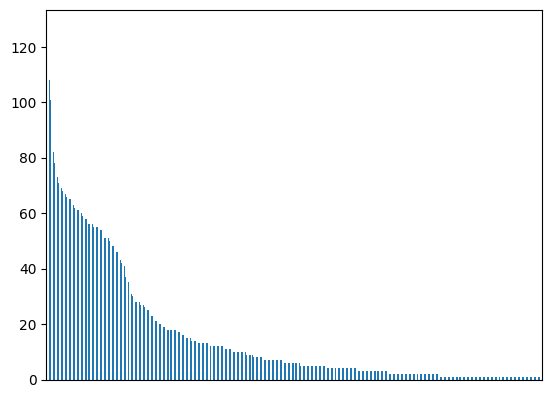

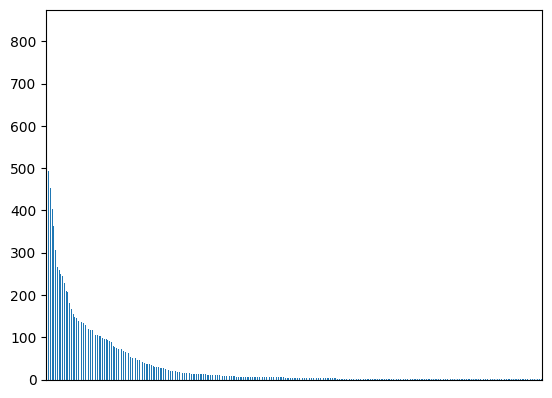

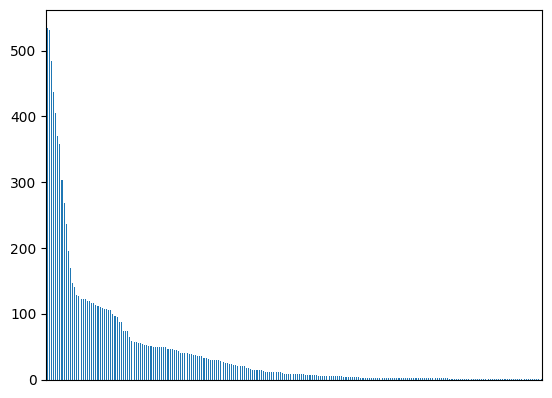

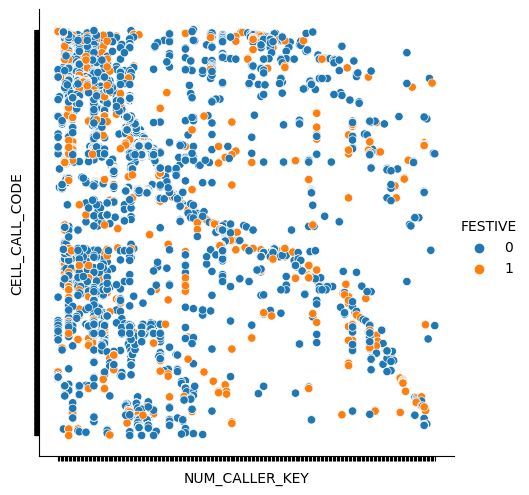

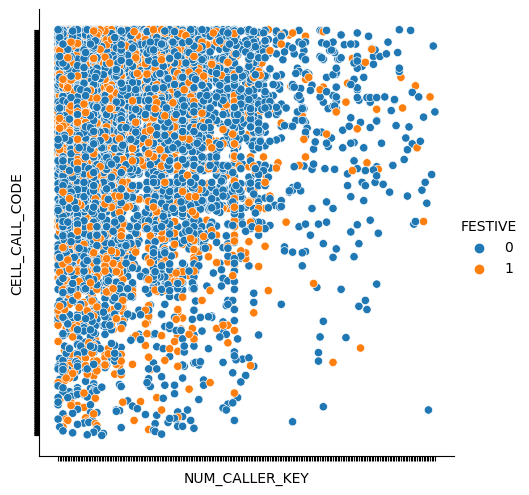


Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 1 - Elapsed Time =  0.21308625399990433

Privacy Metrics Test Aggregated Results:  1.0
Privacy Metrics Test 2 - Elapsed Time =  0.43664032100002714


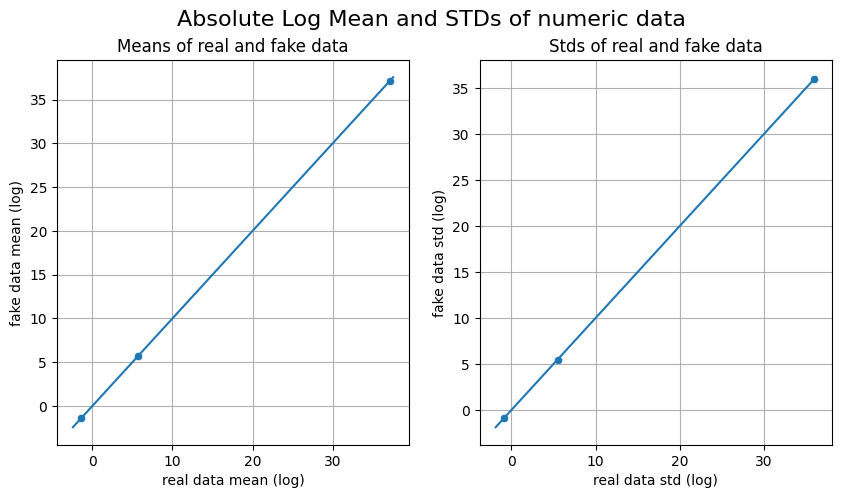

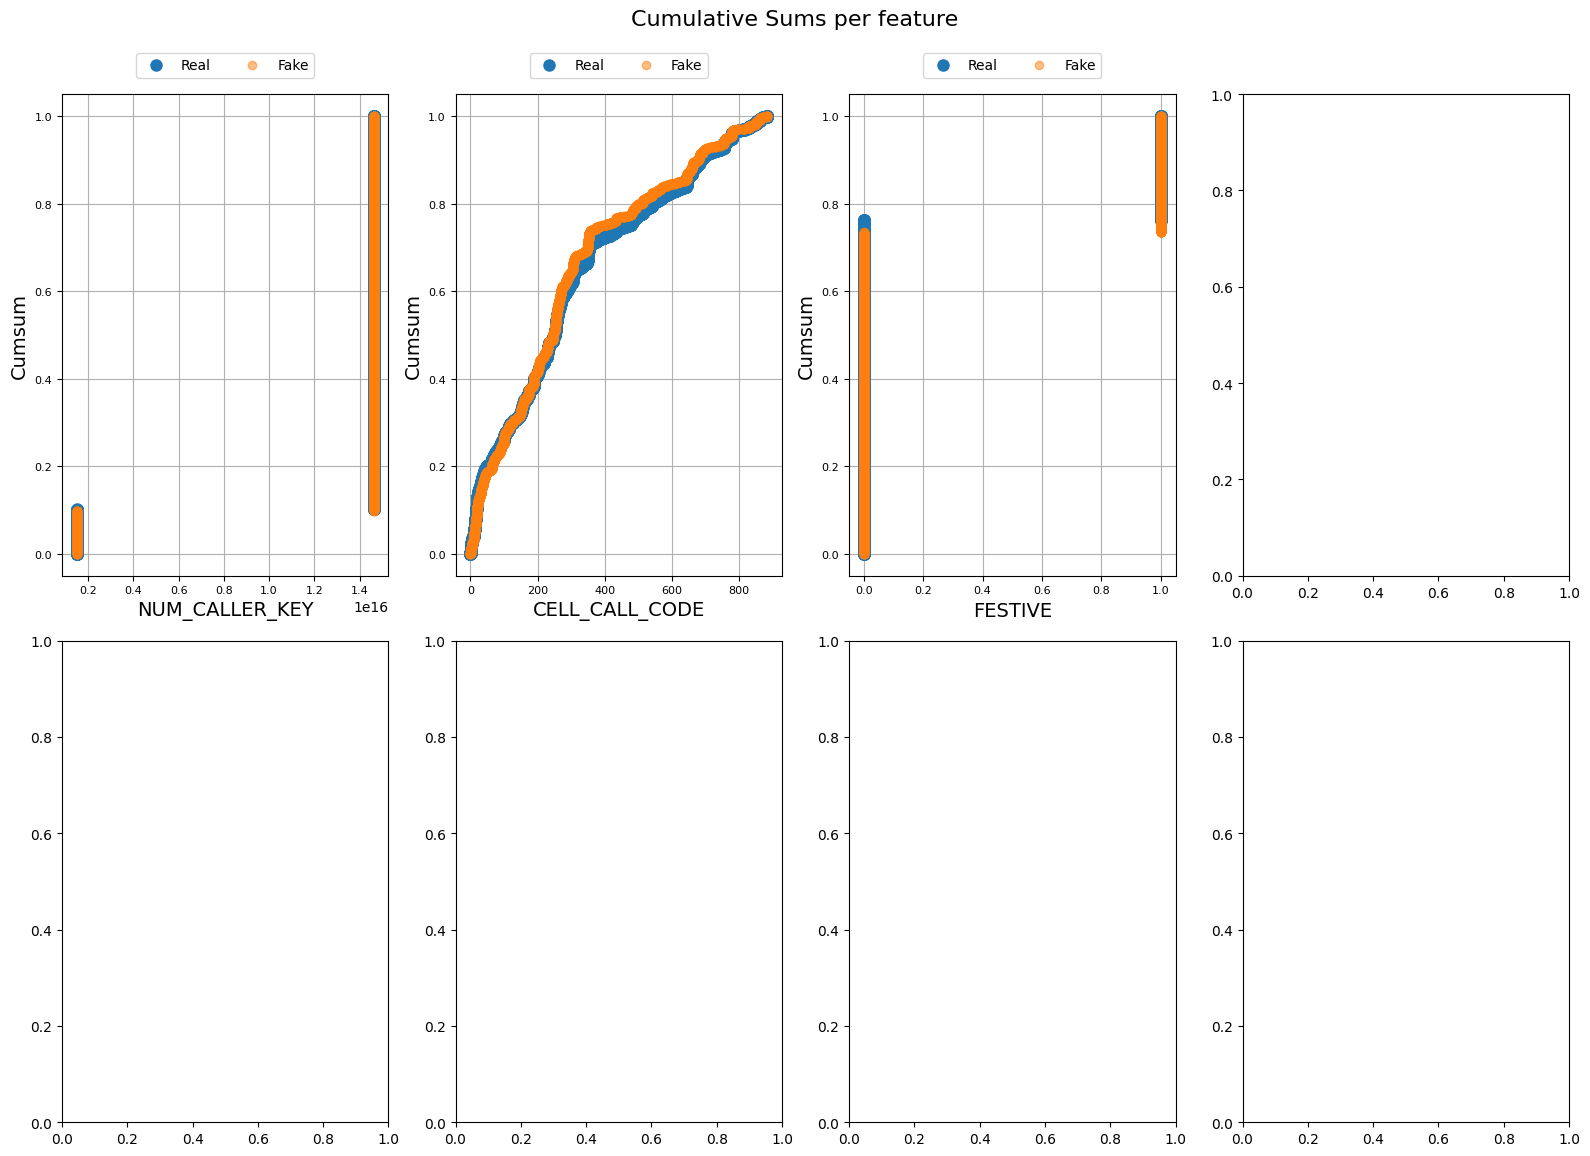

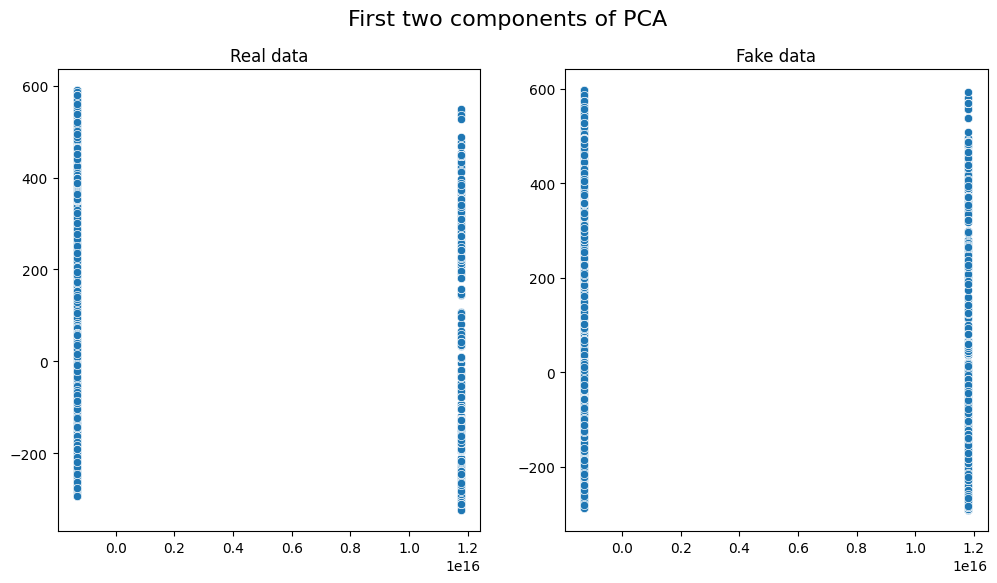


 Plots and Models saved in +'path+' folder.
Zipping...


 Elapsed Time:  278.589591467


In [11]:
start_time = timeit.default_timer()

dirs = [str(f) for f in sorted(Path('/content/Synthetic_Data/synthetic_data/Python/Output/').glob('*_'+str(epochs)+'*_data_points*'))]
dirs.sort(key = lambda x: int(x.split('_')[6]))

for path in dirs:
  print('\n\n'+path)
#path = dirs[0]

  # Original Data Reading
  xl_file = pd.ExcelFile(orig_data_path)
  dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
  orig_data = dfs['Sheet1']
  orig_data.drop("Unnamed: 0", axis=1, inplace=True)
  orig_data.CELL_CALL_CODE=orig_data.CELL_CALL_CODE.astype("str")
  orig_data.NUM_CALLER_KEY=orig_data.NUM_CALLER_KEY.astype("str")

  # Synthetic Data Reading
  xlsx_path = [str(f) for f in sorted(Path(path).glob('*.xlsx'))]
  xl_file = pd.ExcelFile(xlsx_path[0])
  dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
  synth_data = dfs['Sheet1']
  synth_data.drop("Unnamed: 0", axis=1, inplace=True)
  synth_data.CELL_CALL_CODE=synth_data.CELL_CALL_CODE.astype("str")
  synth_data.NUM_CALLER_KEY=synth_data.NUM_CALLER_KEY.astype("str")

  print(str(len(orig_data))+" Original Data Read.")
  print(str(len(synth_data))+" Synthetic Data Read.")

  # Trunk Original Datat to Synthetic Data Size
  orig_data = orig_data[0:len(synth_data)]

  if verbose is True: 
      print("\nOriginal Data: ")
      explore_data(orig_data)
      print("\nSynthetic Data: ")
      explore_data(synth_data)

  # Univariate Distributions Analysis
  if univariate is True:
    sns.distplot(orig_data.CELL_CALL_CODE, kde=True, rug = True)
    plt.savefig(path+'/univariate_distribution_cell_call_code_orig_data.png')
    plt.show()
    sns.distplot(synth_data.CELL_CALL_CODE, kde=True, rug = True)
    plt.savefig(path+'/univariate_distribution_cell_call_code_synth_data.png')
    plt.show()
    sns.distplot(orig_data.NUM_CALLER_KEY, kde=True, rug = True)
    plt.savefig(path+'/univariate_distribution_cell_call_code_orig_data.png')
    plt.show()
    sns.distplot(synth_data.NUM_CALLER_KEY, kde=True, rug = True)
    plt.savefig(path+'/univariate_distribution_cell_call_code_synth_data.png')
    plt.show()

  # Countings Distributions Analysis
  if countings is True:
    orig_data.CELL_CALL_CODE.value_counts().plot.bar(xticks=[])
    plt.savefig(path+'/countings_distribution_cell_call_code_orig_data.png')
    plt.show()
    synth_data.CELL_CALL_CODE.value_counts().plot.bar(xticks=[])
    plt.savefig(path+'/countings_distribution_cell_call_code_synth_data.png')
    plt.show()
    orig_data.NUM_CALLER_KEY.value_counts().plot.bar(xticks=[])
    plt.savefig(path+'/countings_distribution_num_caller_key_orig_data.png')
    plt.show()
    synth_data.NUM_CALLER_KEY.value_counts().plot.bar(xticks=[])
    plt.savefig(path+'/countings_distribution_num_caller_key_synth_data.png')
    plt.show()

  # Bivariate Distributions Analysis
  if bivariate is True: 
    '''
    orig_data.plot.scatter("NUM_CALLER_KEY", "CELL_CALL_CODE", xticks=[], yticks = [])
    plt.show()

    synth_data.plot.scatter("NUM_CALLER_KEY", "CELL_CALL_CODE", xticks=[], yticks = [])
    plt.show()
    '''
    g1 = sns.relplot(x = "NUM_CALLER_KEY", y = "CELL_CALL_CODE" , hue = "FESTIVE", data = orig_data)
    g1.set(xticklabels=[])
    g1.set(yticklabels=[])
    plt.savefig(path+'/bivariate_distribution_cell_call_code_original_data.png')
    plt.show()

    g2 = sns.relplot(x = "NUM_CALLER_KEY", y = "CELL_CALL_CODE" , hue = "FESTIVE", data = synth_data)
    g2.set(xticklabels=[])
    g2.set(yticklabels=[])
    plt.savefig(path+'/bivariate_distribution_cell_call_code_synth_data.png')
    plt.show()

  # Privacy Metrics
  if privacy_metrics is True: 
    start_test_time = timeit.default_timer()
    privacy(orig_data, synth_data, 'CELL_CALL_CODE', 'TIME_CALL, FESTIVE', path+'/privacy_metrics_1.png')
    print("Privacy Metrics Test 1 - Elapsed Time = ", timeit.default_timer() - start_test_time)

    start_test_time = timeit.default_timer()
    privacy(orig_data, synth_data, 'NUM_CALLER_KEY', 'TIME_CALL, FESTIVE', path+'/privacy_metrics_2.png')
    print("Privacy Metrics Test 2 - Elapsed Time = ", timeit.default_timer() - start_test_time)

  if general_evaluator is True: 
    orig_data.drop("TIME_CALL", axis=1, inplace=True)
    #orig_data.drop("FESTIVE", axis=1, inplace=True)
    synth_data.drop("TIME_CALL", axis=1, inplace=True)
    #synth_data.drop("FESTIVE", axis=1, inplace=True)

    orig_data.CELL_CALL_CODE = pd.to_numeric(orig_data.CELL_CALL_CODE)
    orig_data.NUM_CALLER_KEY = pd.to_numeric(orig_data.NUM_CALLER_KEY)
    synth_data.CELL_CALL_CODE = pd.to_numeric(synth_data.CELL_CALL_CODE)
    synth_data.NUM_CALLER_KEY = pd.to_numeric(synth_data.NUM_CALLER_KEY)
          
    table_evaluator = TableEvaluator(orig_data, synth_data)
    #table_evaluator.evaluate(target_col='FESTIVE')
    #table_evaluator.visual_evaluation(save_dir = path)
    table_evaluator.plot_mean_std(fname=path+'/telephony_mean_std.png')
    table_evaluator.plot_cumsums(fname=path+'/telephony_cumsums.png')
    #table_evaluator.plot_distributions(fname=save_dir+'/telephony_distributions.png')  
    #table_evaluator.plot_correlation_difference(fname=path+'/telephony_correlation_difference.png')
    table_evaluator.plot_pca(fname=path+'/telephony_pca.png')

    print("\n Plots and Models saved in +'path+' folder.")
    print("Zipping...")
    os.system('zip -r '+path+'.zip '+path)

print("\n\n Elapsed Time: ", timeit.default_timer() - start_time)

In [12]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   NUM_CALLER_KEY  10000 non-null  int64
 1   CELL_CALL_CODE  10000 non-null  int64
 2   FESTIVE         10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [13]:
synth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   NUM_CALLER_KEY  10000 non-null  int64
 1   CELL_CALL_CODE  10000 non-null  int64
 2   FESTIVE         10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
